<h1 style="text-align: center;"><font color='green'>Prueba 2: Analizado los crímenes en la Ciudad de Nueva York</font></h1>

<font color='green'>*Autor: Rodrigo Barraza*</font>

## <font color='green'>**Contexto**</font>

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset es llamado `stop_and_frisk_data` y contiene información sobre interrogaciones y detenciones realizadas por el departamento de policía de NY en la vía pública. El diccionario de atributos se encuentra en el archivo <font color='red'>2009</font> `SQF File Spec.xls`.

Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo del de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumen de datos reales.

## <font color='green'>**Descripción de la base de datos**</font>
Las variables que componen la base se detallan a continuación.

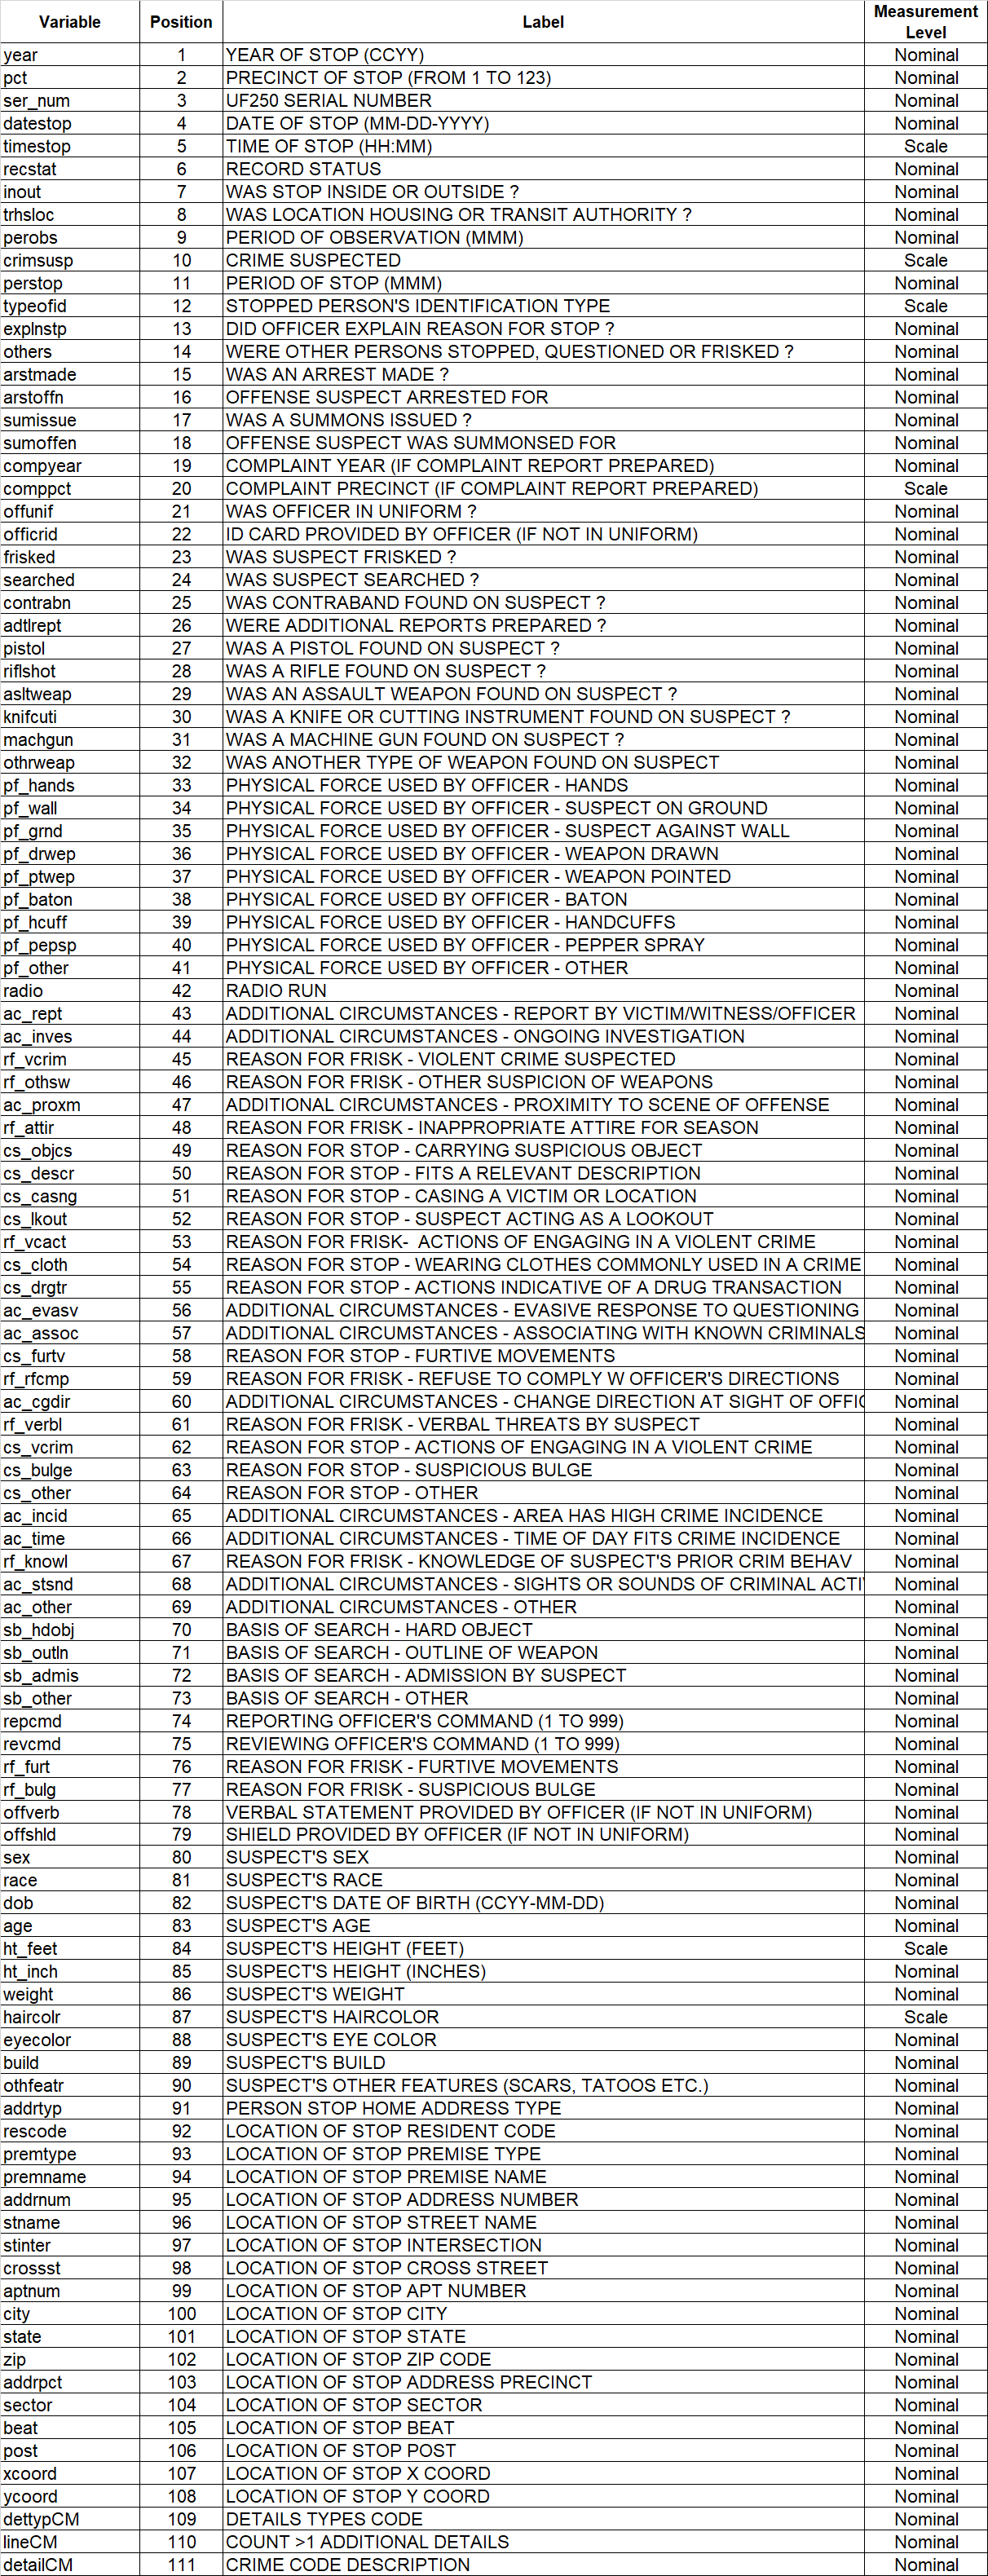

## <font color='green'>**Consideraciones**</font>
- Definir el tipo de modelo a implementar para generar una predicción de arresto, así como su grilla de hiperparámetros.
- Definir la recodificación del vector objetivo para generar una predicción de acción violenta en el procedimiento.
- Implementar el script *preproc_nyc_sqf.py* para igualar la cantidad de atributos en el benchmark

## <font color='green'>**Hito 1:**</font>

#### **<font color='green'>Entendimiento del problema</font>**

Nuestro objetivo es poder predecir si un individuo fue arrestado o no, y si hubo una acción violenta o no. Como la naturaleza de lo mencionado anteriormente, es un 'Si' o un 'No', es que claramente nos encontramos con un problema de clasificación binaria, la cual, la podemos traducir en '1' si el individuo fue arrestado (o hubo una acción violenta) y '0' si no fue arrestado (o si no hubo una acción violenta). Para esto, necesitamos poder contar con variables que describan tanto el procedimiento como características del individuo, las cuales, analizando la data, si contamos con ellas por lo que a priori hay material para realizar el análisis.

Realizando una inspección en el diccionario, notamos que el primer fenómeno a predecir (si un individuo fue arrestado o no), encontramos que esta variable existe y se llama `arstmade`. En cambio, para el segundo fenómeno a predecir (si hubo una acción violenta o no) no encontramos una variable que esté directamente relacionada con esto, pero si hay un grupo de variables que puede explicar esta variable, las cuales son las siguientes: `pf_hands`, `pf_wall`, `pf_grnd`, `pf_drwep`, `pf_ptwep`, `pf_baton`, `pf_hcuff`, `pf_pepsp` y `pf_other`. Si alguna de estas variables tiene por valor igual a 'Yes' ('Y'), quiere decir que hubo una acción violenta, por lo que la variable objetivo del segundo fenómeno será calculada en base a estas variables mencionadas.

Para poder realizar el análisis, es necesario importar algunas librerías clásicas con las que trabajaremos, por ejemplo:
- Se importarán librerías de manipulación de datos como `pandas==1.1.5` y `numpy==1.19.5`
- librerías para realizar visualizaciones como `matplotlib==3.3.4` y `seaborn==0.11.2`
- librerías relacionadas con el modelamiento como `scikit-learn==0.24.2` junto con las métricas asociadas

#### **<font color='green'>Propuesta metodológica</font>**

Para realizar el análisis, se procederá con la siguiente metodología de trabajo:

- Se juntará el dataset de entrenamiento y de testeo en uno solo para realizar las transformaciones correspondientes una vez y luego se separarán para el modelamiento. La forma de separar la data será por la columna `year`: 
    - 2009 para entrenamiento
    - 2010 para testeo
- Como nos encontramos frente a un problema de clasificación, debemos ocupar métricas que estén asociadas a problemas de clasificación. Ahora, dependiendo que tan balanceado estén las categorías de nuestro target, es que ocuparemos diferentes métricas para evaluar nuestro modelo y predicciones (Todas estas métricas se obtendrán de la librería `sklearn`):
    - Si nuestra variable objetivo no presenta problemas de desbalanceo, ocuparemos las siguientes métricas:
        - `accuracy` 
        - `precision`
        - `curva ROC y AUC`
    - Si nuestra variable objetivo presenta problemas de desbalanceo, ocuparemos las siguientes métricas
        - `precision`
        - `recall`
        - `f1-score`
- Para el procesamiento de los atributos, primero inspeccionaremos la cantidad de datos nulos en la data, luego veremos las relaciones que hay con la variable objetivo para inspeccionar diferencias de distribuciones para cada una de las clases (utilizando test estadísticos como un t-test), luego se inspeccionará si existen correlaciones, después se realizarán las recodificaciones pertinentes de cada variable para transformarlas en variables dummy o en categorías numéricas, además se evaluará dado la volumetría de los datos (cantidad de variables), realizar algún tipo de reducción de dimensionalidad como un PCA o AF, por último se realizará un estudio econométrico para determinar las variables más relevantes y se modelará para ver si podemos obtener un modelo más parsimonioso con métricas similares.

#### **<font color='green'>Modelos y grillas a implementar</font>**

Por lo mencionado en los enunciados, debemos realizar al menos 3 modelos para la predicción del procedimiento que concluirá en un arresto y al menos 5 modelos para la predicción del procedimiento policial que concluirá en alguna acción violenta. Dicho lo anterior, nuestros modelos propuestos junto los hiperparámetros a ocupar serán los siguientes:

Para el procedimiento que concluirá en un arresto:
- `LogisticRegression`: 
    - *penalty*: l1, l2, elasticnet, None
    - *C*: [0.01, 1, 100]
- `DecisionTreeClassifier`: 
    - *criterion*: gini, entropy, log_loss
    - *max_features*: None, log2, sqrt
    - *max_depth*: entre 1 y 20
- `RandomForestClassifier`:
    - *max_features*: None, log2, sqrt
    - *n_estimators*: Evaluar entre 20 y 1000 en pasos de 50


Para el procedimiento policial que concluirá en alguna acción violenta:
- `LogisticRegression`:
    - *penalty*: l1, l2, elasticnet, None
    - *C*: [0.01, 1, 100]
- `RandomForestClassifier`:
    - *max_features*: None, log2, sqrt.
    - *n_estimators*: Evaluar entre 20 y 1000 en pasos de 50
- `SVC`:
    - *C*: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    - *gamma*: [0.0001, 0.001, 0.01, 0.1, 1, 10]
    - *cv*: 10
- `GradientBoostingClassifier`:
    - *learning_rate*: [0.01, 0.1, 0.5],
    - *n_estimators*: [50, 100, 500, 1000, 2000],
    - *subsample*: [0.1,0.5,0.9]
- `VotingClassifier`:
    - *estimators*: los mejores 4 modelos anteriores con los mejores hiperparámetros encontrados

además, en caso de ameritarlo, se ocupará el parámetro `class_weight` si tenemos nuestro dataset desbalanceado.

#### **<font color='green'>Estudio del vector objetivo</font>**

Para el estudio de la variable objetivo, primero cargaremos las librerías necesarias y el dataset. Después, nos centraremos en el estudio de los dos fenómenos de interés, que corresponde a la variable `arstmade` y al set de datos que corresponde al tipo de uso de fuerza de la policía descrita anteriormente.

In [1]:
# Importamos las librerías clasicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter
from datetime import datetime
from funciones import porcentaje_null, distr_num, dist_cat, valores_unicos, dummies, plot_classification_report, matriz_confusion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Para filtrar los warnings
warnings.filterwarnings('ignore')

# Cargamos los datos de entrenamiento y de test
df_train = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
df_test = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')

# Juntamos ambos dataset
df = pd.concat([df_train, df_test])
df

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2.0,MISD,...,,60,I,,,989382,155162,CM,1,20
6009,2010,75,15797,7302010,10,A,O,P,1.0,ROBBERY,...,,75,A,,,1012757,186018,CM,1,85
6010,2010,123,830,4302010,1630,A,O,P,3.0,GLA,...,,123,E,,,933868,138600,CM,1,46
6011,2010,115,13122,11232010,2100,1,O,P,1.0,FELONY,...,,115,E,,,1014722,214388,CM,1,85


Ahora, revisamos los vectores objetivos:

- `Procedimiento concluirá en un arresto o no:` la variable que indica si el procedimiento concluirá en un arresto o no es `arstmade`.

N    0.940124
Y    0.059876
Name: arstmade, dtype: float64

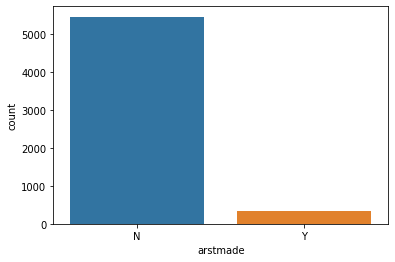

In [2]:
# Procedimiento que concluirá en un arresto, hace referencia a la variable arstmade, por lo que inspeccionamos esta variable:

# Graficamos la cantidad de datos por categoria
sns.countplot(data=df_train, x='arstmade')

# Revisamos la proporcion entre estas categorias
df_train['arstmade'].value_counts(normalize=True)

Claramente, se ve un serio problema de desbalanceo, ya que nuestra clase de interés `'Y'` es la minoritaria, por lo que a futuro tendremos que abordar este problema aplicando técnicas para tratar el desbalanceo, como un *subsampling*, *oversampling*, o mixto.

- `Procedimiento policial concluirá en alguna acción violenta:` Esta variable debe construirse, con las variables que indican si el oficial utilizó fuerza física. Las variables que indican lo anterior son: `pf_hands`, `pf_wall`,`pf_grnd`, `pf_drwep`, `pf_ptwep`, `pf_baton`, `pf_hcuff`, `pf_pepsp` y `pf_other`

N    0.75
Y    0.25
Name: violence, dtype: float64

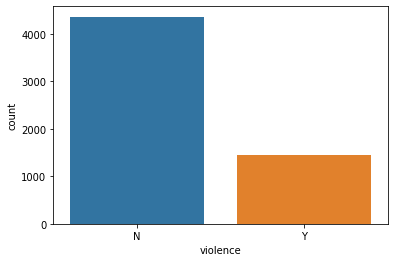

In [3]:
# La accion violenta será si es que alguna de estas variables es 1

# Obtenemos el nombre de las variables de interés
violence = ['pf_hands', 'pf_wall','pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other']

# Creamos el vector objetivo
df['violence'] = df[violence].replace(['Y','N'],[1,0]).sum(axis=1)
df['violence'] = np.where(df['violence']>0,'Y','N')

# Graficamos la cantidad de datos por categoria
sns.countplot(data=df[df['year']==2009], x='violence')

# Revisamos la proporcion entre estas categorias
df[df['year']==2009]['violence'].value_counts(normalize=True)

Al igual que la otra variable, tenemos un problema de desbalanceo de nuestro target, y nustra clase de interés `'Y'` es la clase minoritaria, por lo que a futuro tendremos que tratar este desbalanceo aplicando técnicas que nos permitan resolver o mitigar este problema.

#### **<font color='green'>Estudio de datos nulos</font>**

Para ver la cantidad de nulos en el dataset, llamaremos a la función creada llamada `porcentaje_null` la cual reporta la cantidad del datos perdidos por columna y el porcentaje que representa

In [4]:
porcentaje_null(df)

          N_NaN  Porcentaje
premname      1      0.0001
stinter       1      0.0001
year          0      0.0000
sb_admis      0      0.0000
dob           0      0.0000
...         ...         ...
pf_wall       0      0.0000
pf_hands      0      0.0000
othrweap      0      0.0000
machgun       0      0.0000
violence      0      0.0000

[112 rows x 2 columns]


observamos que las variables que poseen datos perdidos son `premname` y `stinter`, las cuales, en términos de porcentaje es demasiado pequeño, por lo que para simplificar el análisis, eliminaremos los registros con NaN:

In [5]:
df.dropna(inplace=True)

df.shape

(11823, 112)

#### **<font color='green'>Recodificación del vector objetivo</font>**

Como nos encontramos en un problema de clasificación binaria, debemos recodificar las variables como 0 y 1, dejando como 1 indicando que sí se realizó la acción:

- Procedimiento concluirá en un arresto o no:

In [6]:
df['arstmade'] = np.where(df['arstmade']=='Y',1,0)

- Procedimiento policial concluirá en alguna acción violenta:

In [7]:
df['violence'] = np.where(df['violence']=='Y',1,0)

## <font color='green'>**Hito 2:**</font>

#### **<font color='green'>Ingeniería de atributos</font>**

Antes de realizar cualquier análisis, revisando el diccionario, nos damos cuenta que existen algunas variables que no debiesen entrar ya que son códigos o tienen muchas categorias. Para revisar esto, llamamos a la función creada `valores_unicos`:

In [8]:
valores_unicos(df)

Columna : year
2010    0.508416
2009    0.491584
Name: year, dtype: float64
--------------------------------------------------------------------------------
Columna : pct
75     0.051341
73     0.039668
120    0.036031
79     0.030618
40     0.027489
         ...   
94     0.003722
123    0.003722
50     0.003129
17     0.003045
22     0.002199
Name: pct, Length: 76, dtype: float64
--------------------------------------------------------------------------------
Columna : ser_num
2050     0.000592
250      0.000507
2256     0.000507
459      0.000507
716      0.000507
           ...   
13272    0.000085
7125     0.000085
11219    0.000085
13685    0.000085
6147     0.000085
Name: ser_num, Length: 7789, dtype: float64
--------------------------------------------------------------------------------
Columna : datestop
2112009     0.003383
5282010     0.002960
1222009     0.002791
1232010     0.002707
4232010     0.002707
              ...   
12282010    0.000254
12252010    0.000169
122620

Si nos fijamos, hay algunas variables que tienen demasiados atributos, como por ejemplo las variables `ser_num`, `crimsusp`, `arstoffn`, `sumoffen`, `premname`, `stname`, `stinter`, `crossst`, `detailcm`, `addrnum`, `addrpct` y `sector` (estas variables son de tipo categórico, por lo que al tener muchas categorias o strings, por lo que no es posible poder incluirlas en un modelo). Estas variables serán eliminadas directamente del análisis y del dataset:

In [9]:
# Definimos las variables a eliminar
columns = ['ser_num','crimsusp','arstoffn','sumoffen','premname','stname','stinter','crossst','detailcm','addrnum','addrpct','sector']

# Definimos un nuevo dataset con las columnas eliminadas
df_filter = df.drop(columns=columns)

Por otro lado, hay algunas variables que sólo poseen 1 atributo, como `compyear`, `comppct`, `adtlrept`, `machgun`, `othfeatr`, `rescode`, `premtype`, `aptnum`, `state` y `zip`. Estas variables también serán eliminadas del análisis ya que no aporta nada de variabilidad ya que solo hay 1 solo valor (ya sea un valo `' '` u otro):

In [10]:
# Revisamos si efectivamente posee datos unicos
col = ['compyear','comppct','adtlrept','machgun','othfeatr','rescode','premtype','aptnum','state','zip']
df_filter[col].value_counts()

compyear  comppct  adtlrept  machgun  othfeatr  rescode  premtype  aptnum  state  zip
0         0        N         N                                                           11823
dtype: int64

In [11]:
# Como posee valores unicos, las eliminamos del análisis
df_filter.drop(columns=col, inplace=True)

Ahora, tambíen hay otras categorias que solo tienen 1 registro diferente, las cuales son `addrtyp`, `dettypcm`, `linecm` y `asltweap`. Estas también serán eliminadas del análisis:

In [12]:
# Revisamos para ver si efectivamente es correcto
display(df_filter['addrtyp'].value_counts())
display(df_filter['dettypcm'].value_counts())
display(df_filter['linecm'].value_counts())
display(df_filter['asltweap'].value_counts())

# Eliminamos las variables del set de datos
df_filter.drop(columns=['addrtyp','dettypcm','linecm','asltweap'], inplace=True)

L    11822
         1
Name: addrtyp, dtype: int64

CM    11822
          1
Name: dettypcm, dtype: int64

1    6010
1    5812
        1
Name: linecm, dtype: int64

N    11822
Y        1
Name: asltweap, dtype: int64

También, hay otro tipo de variables que es posible recodificar sus categorias, como las variables `race`, `haircolr` y `eyecolor`, ya que hay muchas categorias muy especificas, pero podriamos agruparlas. Revisaremos las 3 detalladamente:

- variable `race`:

In [13]:
# Observamos la distribución de los registros
df_filter['race'].value_counts(normalize=True)

B    0.535482
Q    0.247061
W    0.094477
P    0.056754
A    0.030787
Z    0.024444
U    0.006597
I    0.004398
Name: race, dtype: float64

Revisando el significado de cada atributo, se procederá a lo siguiente: `se agregará la categoria 'I' y 'A' a la categoría Z (otros)`

In [14]:
# Realizamos el replace de las categorias mencionadas
df_filter['race'] = df_filter['race'].replace(['I','A'], 'Z')

- variable `haircolr`:

In [15]:
# Observamos la distribución de los registros
df_filter['haircolr'].value_counts(normalize=True)

BK    0.753616
BR    0.193775
BA    0.015394
BL    0.012264
GY    0.009304
XX    0.004652
SP    0.004567
ZZ    0.004229
RA    0.001438
DY    0.000507
SN    0.000254
Name: haircolr, dtype: float64

Revisando el significado de cada atributo, se procederá a lo siguiente: 
- `BR se añadirá a la categoria BK (NEGRO)`
- `DY, FR, GY, RA, SN, SP, WH quedará en la categoría ZZ (OTRO)`

In [16]:
# Realizamos el replace de las categorias mencionadas
df_filter['haircolr'] = df_filter['haircolr'].replace(['DY','FR','GY','RA','SN','SP','WH'], 'ZZ').replace('BR','BK')

- variable `eyecolor`:

In [17]:
# Observamos la distribución de los registros
df_filter['eyecolor'].value_counts(normalize=True)

BR    0.896050
BK    0.065550
BL    0.016324
GR    0.006344
HA    0.006259
XX    0.003891
Z     0.002876
GY    0.001607
DF    0.000761
MA    0.000254
VI    0.000085
Name: eyecolor, dtype: float64

Revisando el significado de cada atributo, se procederá a lo siguiente: 
- `las categorías 'HA','GY','DF','MA','VI' se añadirán a la categría Z (OTROS)`
- `'BL' y 'GR' se añadirá a la categoria CL (COLOR)`

In [18]:
# Realizamos el replace de las categorias mencionadas
df_filter['eyecolor'] = df_filter['eyecolor'].replace(['HA','GY','DF','MA','VI'], 'Z').replace(['BL','GR'],'CL')

Además, notamos que para la variable `city`, hay un par de categorias que debiesen ser las mismas, esta es `STATEN ISLAND` la cual también se encuentra como `STATEN IS`, por lo que se juntarán.

In [19]:
# Observamos la distribución de los registros
display(df_filter['city'].value_counts())

# Reemplazamos este valor
df_filter['city'] = df_filter['city'].replace('STATEN IS', 'STATEN ISLAND')

BROOKLYN         4056
QUEENS           2752
MANHATTAN        2426
BRONX            2011
STATEN IS         292
STATEN ISLAND     285
                    1
Name: city, dtype: int64

También, notamos que muchas variables tiene registros vacios con espacios `' '`. Antes de realizar un reemplazo de estos, inspeccionaremos qué variables son:

In [20]:
# Obtenemos el nombre de las columnas que tienen estas celdas con espacio y el porcentaje que representa del dataset

df_empt = pd.DataFrame((df_filter==' ').sum(), columns=['n_vacio'])

df_empt['porcentaje'] = round(df_empt['n_vacio']/len(df_filter),4)

df_empt[df_empt['n_vacio']>0]

,n_vacio,porcentaje
trhsloc,205,0.0173
officrid,11662,0.9864
offverb,9244,0.7819
offshld,8573,0.7251
city,1,0.0001
beat,7442,0.6295
post,10649,0.9007
xcoord,416,0.0352
ycoord,416,0.0352


Revisamos el tipo de variable de cada ya que algunas variables son numéricas y otras categóricas:

In [21]:
# Definimos las columnas mostradas anteriormente
col = df_empt[df_empt['n_vacio']>0].index.to_list()

# Revisamos su distribución
valores_unicos(df_filter[col])

Columna : trhsloc
P    0.750063
H    0.157151
T    0.075446
     0.017339
Name: trhsloc, dtype: float64
--------------------------------------------------------------------------------
Columna : officrid
     0.986382
I    0.013618
Name: officrid, dtype: float64
--------------------------------------------------------------------------------
Columna : offverb
     0.781866
V    0.218134
Name: offverb, dtype: float64
--------------------------------------------------------------------------------
Columna : offshld
     0.725112
S    0.274888
Name: offshld, dtype: float64
--------------------------------------------------------------------------------
Columna : city
BROOKLYN         0.343060
QUEENS           0.232767
MANHATTAN        0.205193
BRONX            0.170092
STATEN ISLAND    0.048803
                 0.000085
Name: city, dtype: float64
--------------------------------------------------------------------------------
Columna : beat
        0.629451
9       0.035693
1       0.0264

observamos que tanto la variable `beat` como `post` son variables que debiesen ser numéricas, pero el porcentaje de valores en blanco es más de la mitad del dataset, por lo que como no es una categoria, debemos eliminar esos registros, pero son muchos. Por lo tanto, se opta por sacar del dataset: 

In [22]:
# Eliminamos esas variables
df_filter.drop(columns=['beat','post'], inplace=True)

Ahora, para las variables categóricas que corresponden, creamos las nueva categoria `U` de `UNKNOWN`:

In [23]:
# Definimos las columnas que debemos reemplazar los valores ' '
col = ['trhsloc','officrid','offverb','offshld']

# Reemplazamos los valores
df_filter[col] = df_filter[col].replace(' ','U')

y para el resto de variables, las eliminamos del set de datos:

In [24]:
# Eliminamos los registros que contengas estos datos en el dataset
df_filter = df_filter.replace(' ',np.nan).dropna()

Ahora, le daremos el tipo de formato que corresponde para algunas variables, ya que al inspeccionar el diccionario de datos y el significado de cada una de ellas junto con la distribución observada al llamar a la funcion `valores_unicos`, nos damos cuenta que al cargar la data, vienen con un tipo de dato que no es adecuado, por lo tanto solo se convertirán los datos que debiesen ser flotantes:

In [25]:
# Definimos las columnas que debiesen ser flotantes y las convertimos
col_float = ['pct', 'perobs', 'perstop', 'age', 'ht_feet', 'ht_inch', 'weight', 'xcoord', 'ycoord']
df_filter[col_float] = df_filter[col_float].astype(float)

Ahora, para las variables que tienen la fecha de detención y horario de la detención, se crearán dos nuevas variables, una que tenga el mes donde fue detenido y otra que tenga el horario de la detención (si fue horario AM o PM):

In [26]:
# Convertimos las variable datestop en fecha y extraemos el mes como nueva variable
df_filter['datestop'] = df_filter['datestop'].apply(lambda x: datetime.strptime(str(x), '%m%d%Y'))
df_filter['month'] = df_filter['datestop'].apply(lambda x: x.month).astype(float)

# Para la variable hora, extramos si la detencion fue en horario AM o PM
df_filter['horario'] = np.where(df_filter['timestop'] >= 1200, 'PM', 'AM')

Por otro lado, revisando las variables, nos damos cuenta que trae las coordenadas de donde se hizo el procedimiento, por lo que realizaremos un mapa para observar si es que hay arrestos concentrados en algún sector:

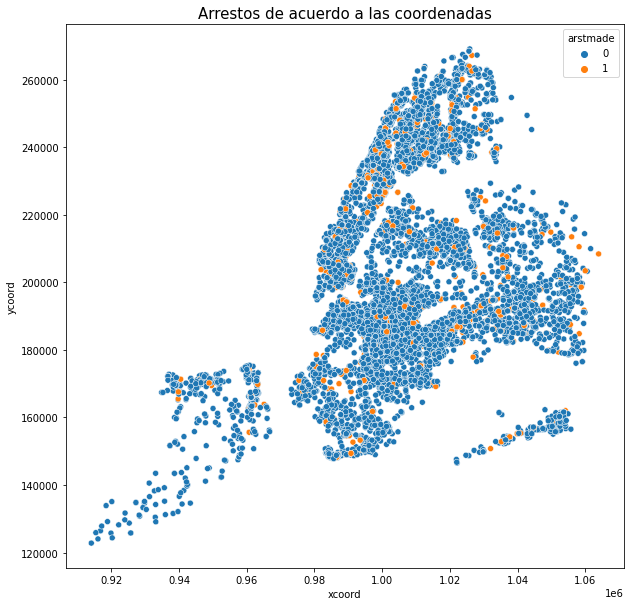

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_filter['xcoord'], y=df_filter['ycoord'], hue=df_filter['arstmade'])
plt.title('Arrestos de acuerdo a las coordenadas', fontsize=15);

Aparentemente, no se observa ningun sector cargado donde ocurran más arrestos que otros. De todas formas, esta variable de coordenadas ingresará al modelo.

Realizaremos el mismo gráfico, pero ahora para detectar si es que hubo en algún sector un procedimiento con violencia:

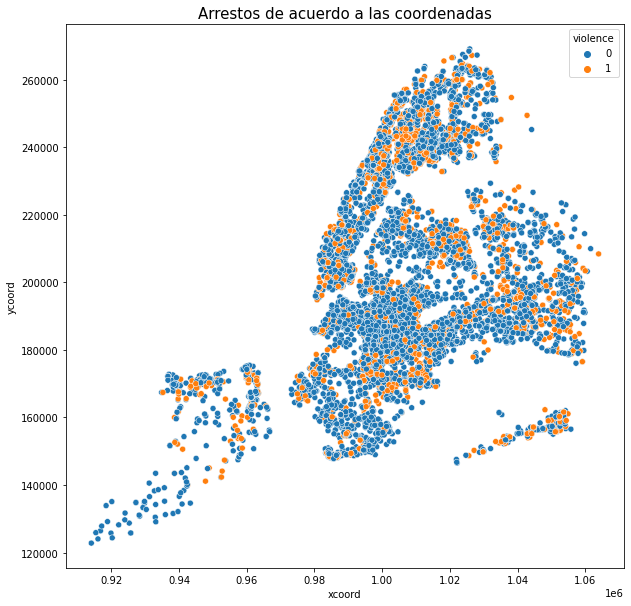

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_filter['xcoord'], y=df_filter['ycoord'], hue=df_filter['violence'])
plt.title('Arrestos de acuerdo a las coordenadas', fontsize=15);

Podemos observar que si bien hay mas casos donde se produce violencia, no hay tantos sectores marcados.

Ahora, revisaremos la distribución de cada una de las variables con respecto a los vectores objetivos:

- Para la variable `arstmade`:

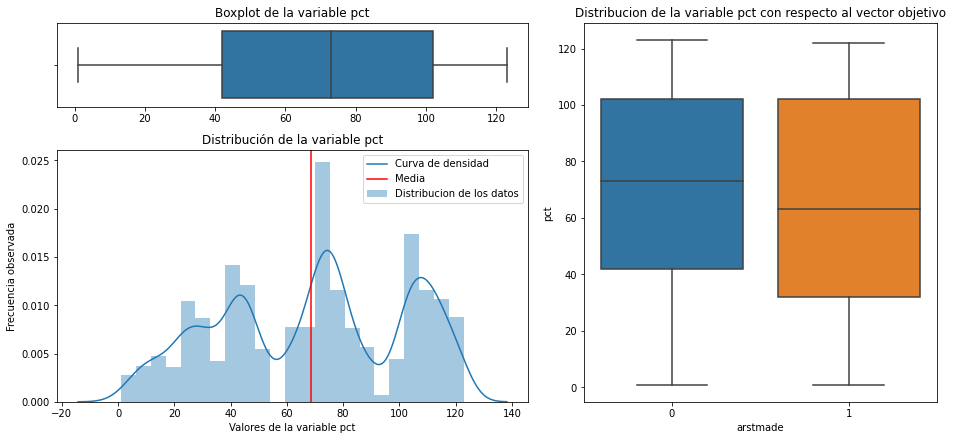

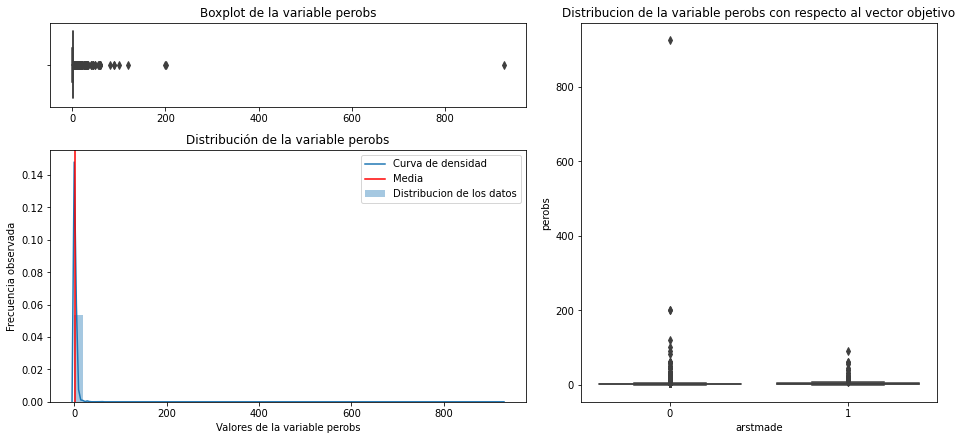

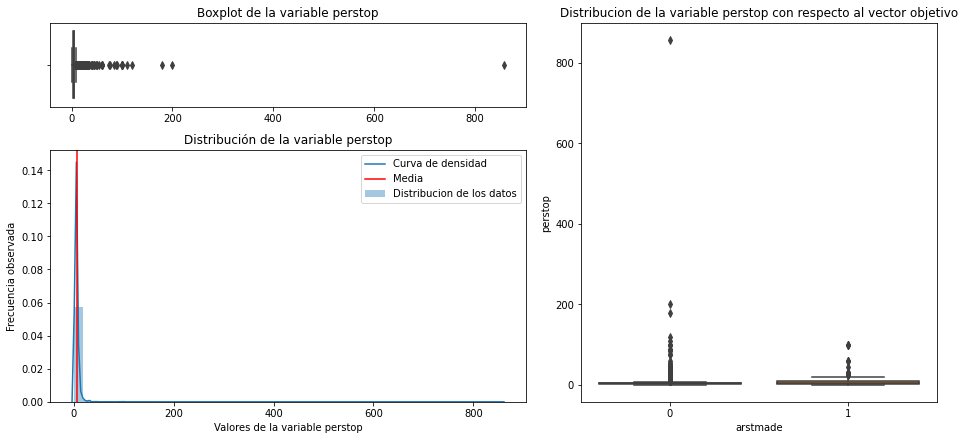

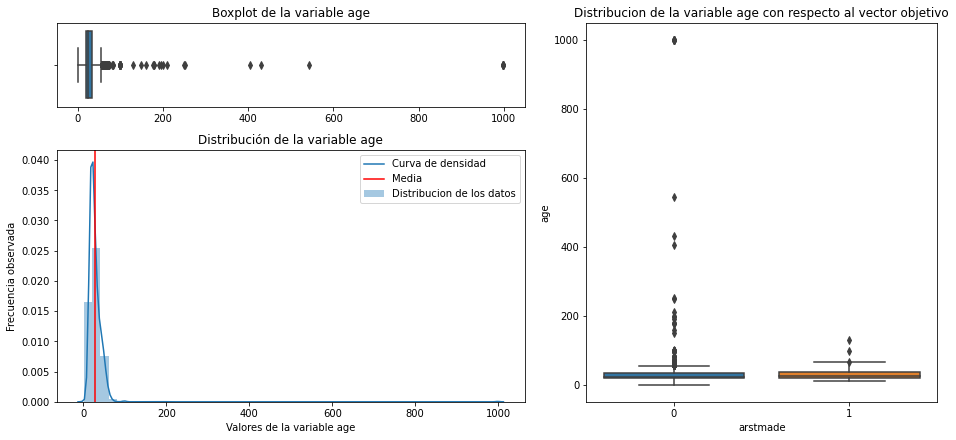

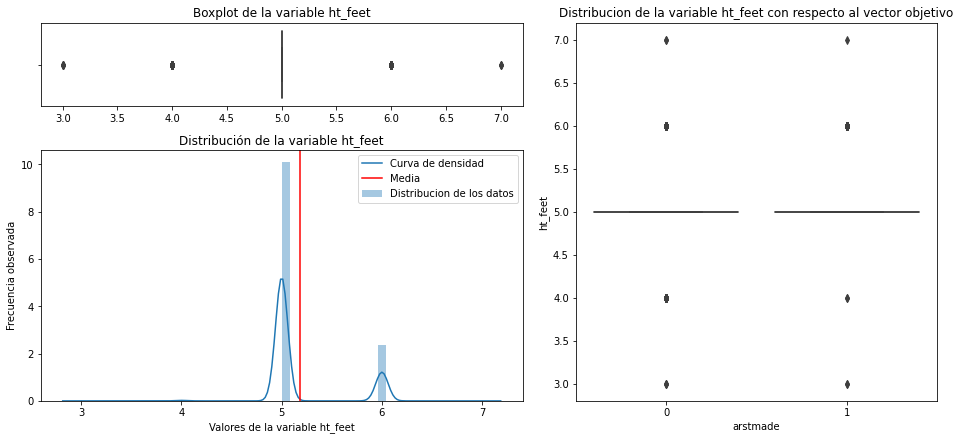

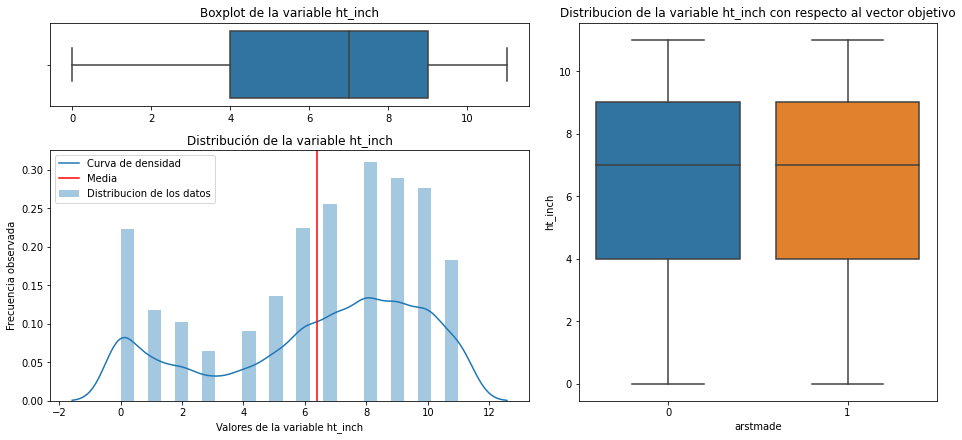

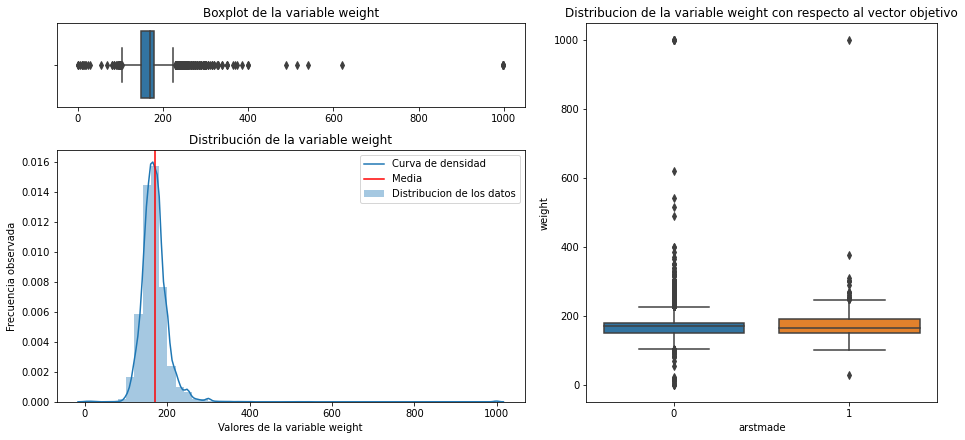

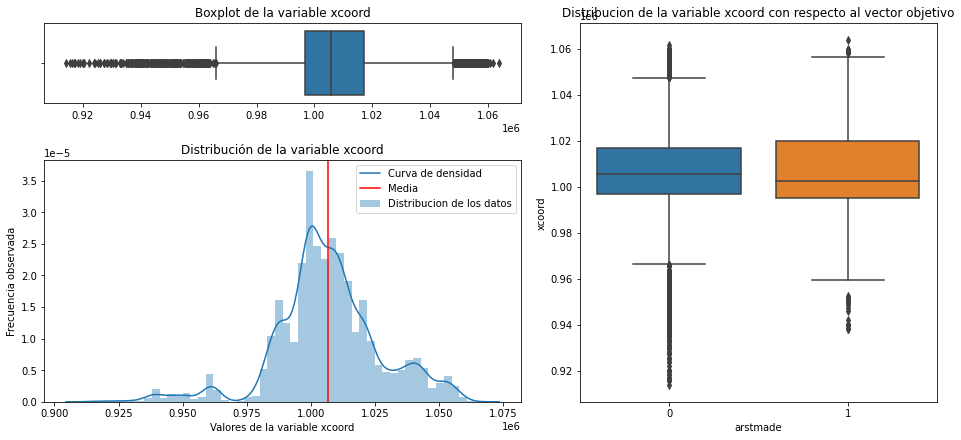

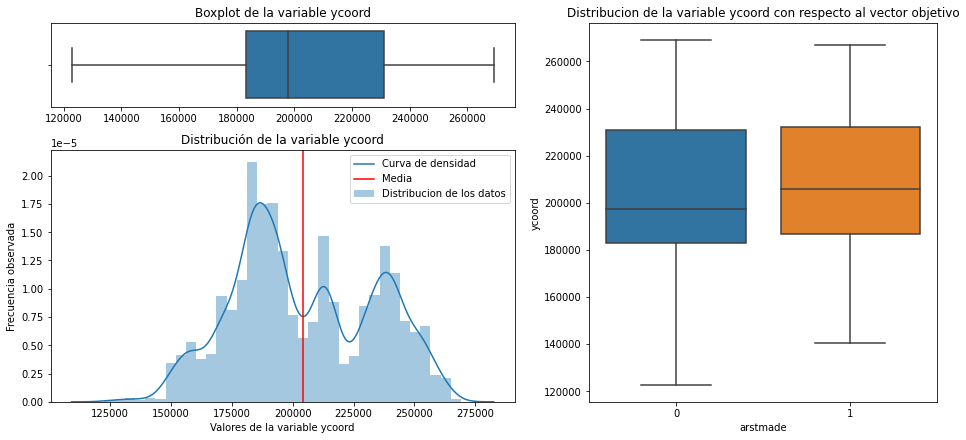

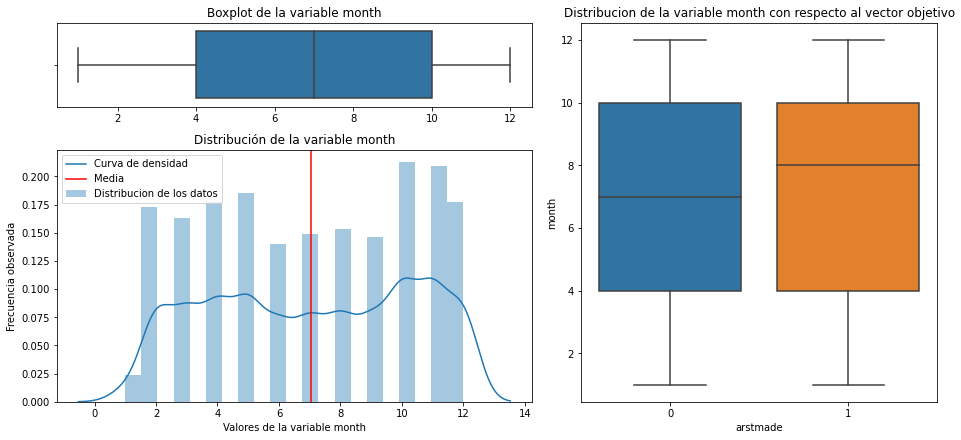

In [29]:
# Revisamos la distribución de las variables numéricas
col = df_filter.select_dtypes(float).columns

for i in col:
    distr_num(df_filter, i, 'arstmade')

No se logra apreciar diferencias entre cada una de las clases para cada una de esas variables, si se puede mencionar que hay dos `perobs` y `perstop` hay unos registros demasiado atipicos, que estan por sobre el valor 100, por lo que se eliminarán estos registros. Lo mismo pasa con la variable `weigth` que tiene un registro de 1000 lo cual consideramos que es un dato erroneo, por lo que tambien se eliminará ese registro. Además, se ve que para la variable `age`, hay valores por sobre los 100 (incluso un valor igual a 1000) por lo que claramente, hay registros erroneos, por lo que esta variable para no perder registros, se categorizará, pero para eso veremos como es su distribución entre 0-100:

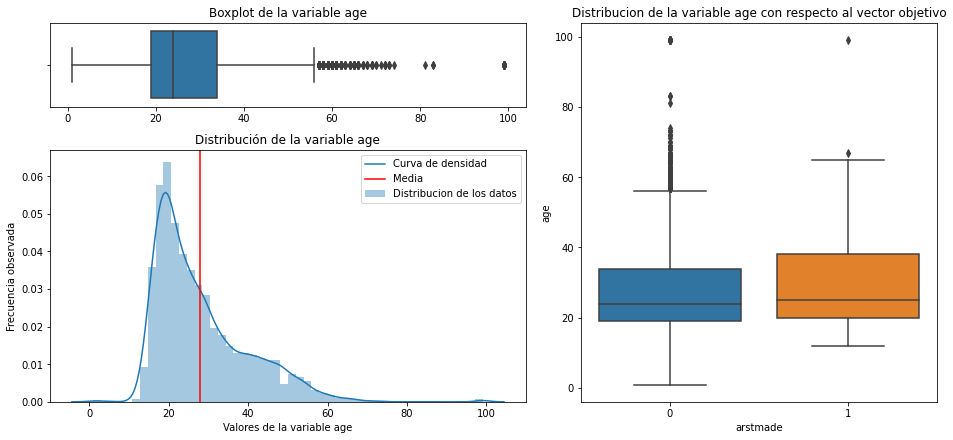

In [30]:
# Eliminamos los registros outliers mencionados
df_filter = df_filter[(df_filter['perobs']<100) & (df_filter['perstop']<100) & (df_filter['weight']<999)]

# Revisamos la variable age entre 0-100
distr_num(df_filter[df_filter['age']<100], 'age', 'arstmade');

claramente, vemos que la mayor parte de las detenciones (o interrogantes), se encuentran entre sujetos menores a los 21 años aproximadamente. Por lo dicho anteriormente, se crearán las siguientes categorias:

- '21-': sujetos menores a 21 años
- '22-30': sujetos entre 22 y 30 años
- '31-45': sujetos entre 31 y 45 años
- '46-60': sujetos entre 46 y 60 años
- '60+': sujetos mayores a 60 años. Esta última categoria, conectrará los registros inconsistentes.

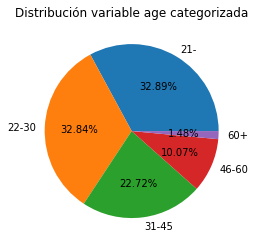

In [31]:
# Ceteamos alas categorias a crear
values = [-math.inf, 21, 30, 45, 60, math.inf]
cat = ['21-','22-30','31-45','46-60','60+']

# Creamos la variable categorizada
df_filter['age_cat'] = pd.cut(x=df_filter['age'], bins=values, labels = cat, right=False).astype(str)

# Vemos su distribución
df_filter['age_cat'].value_counts().plot(kind='pie', autopct='%.2f%%', title='Distribución variable age categorizada')
plt.ylabel('');

Ahora revisaremos la distribución de las variables categoricas

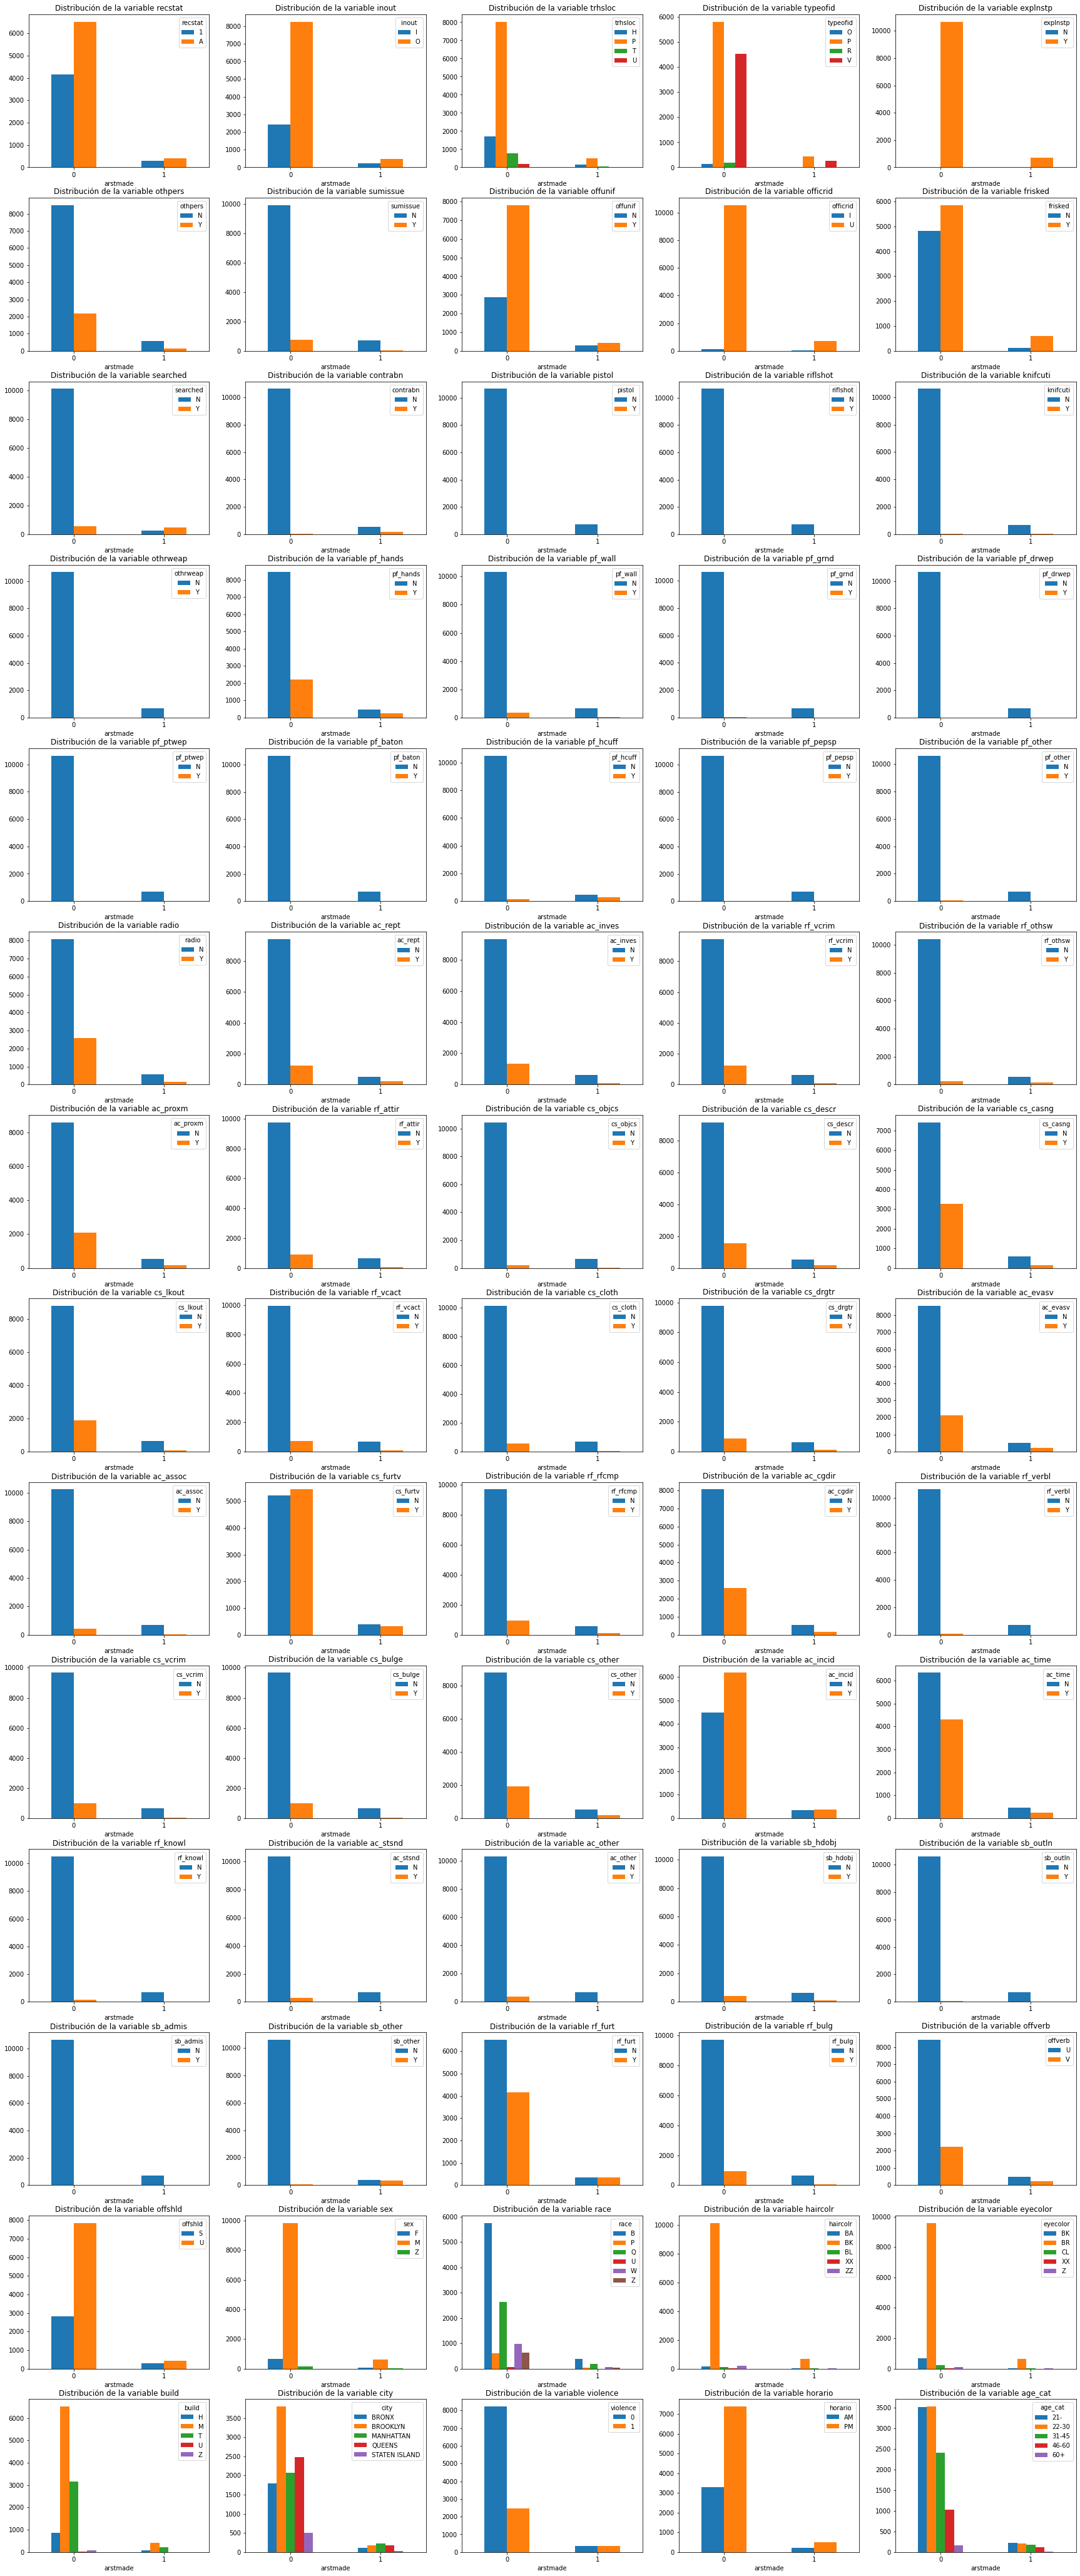

In [32]:
# Llamamos a la función dist_cat para graficar con graficos de barras cada una de las variables categóricas con el vector objetivo
dist_cat(df_filter, 'arstmade')

a priori, revisando cada uno de los gráficos mostrados, no hay ninguna variable que podamos justificar para sacar del modelo.

- Para la variable `violence`

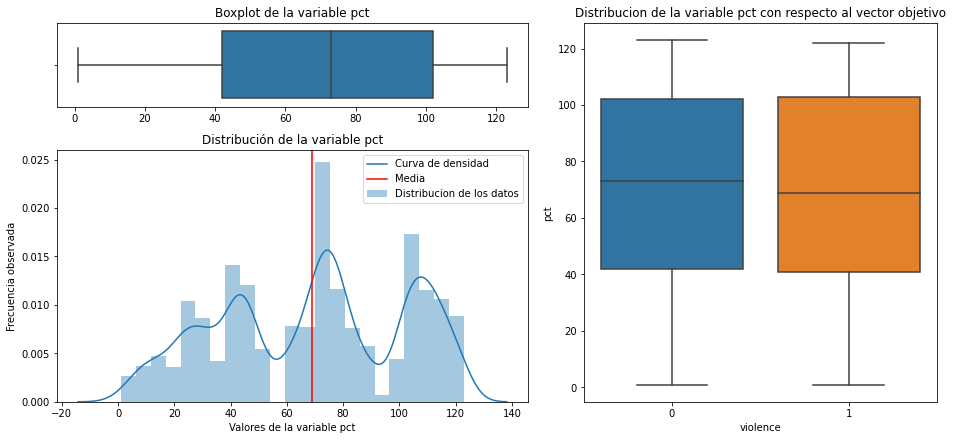

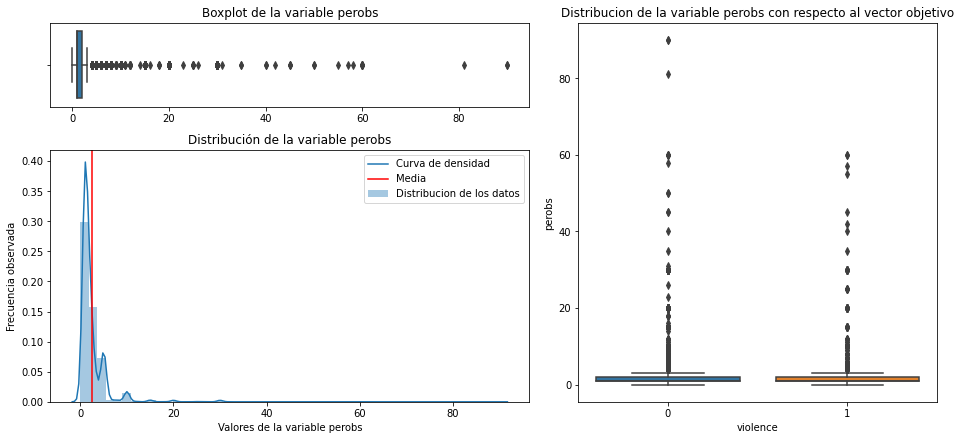

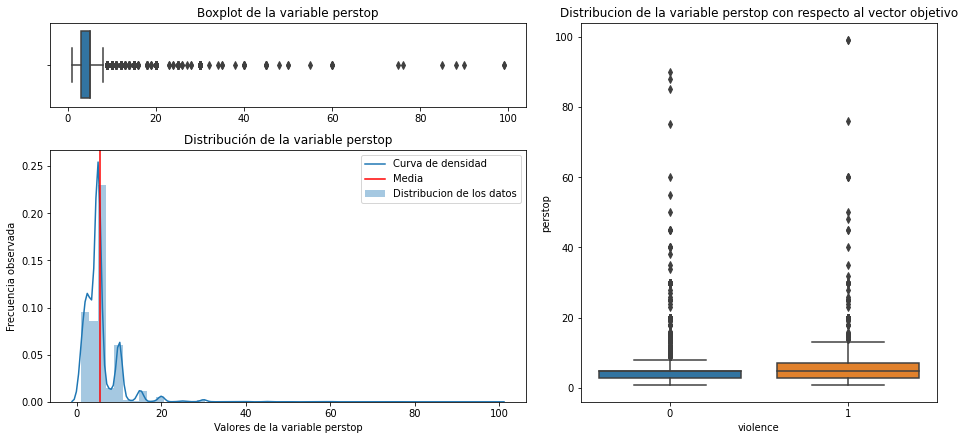

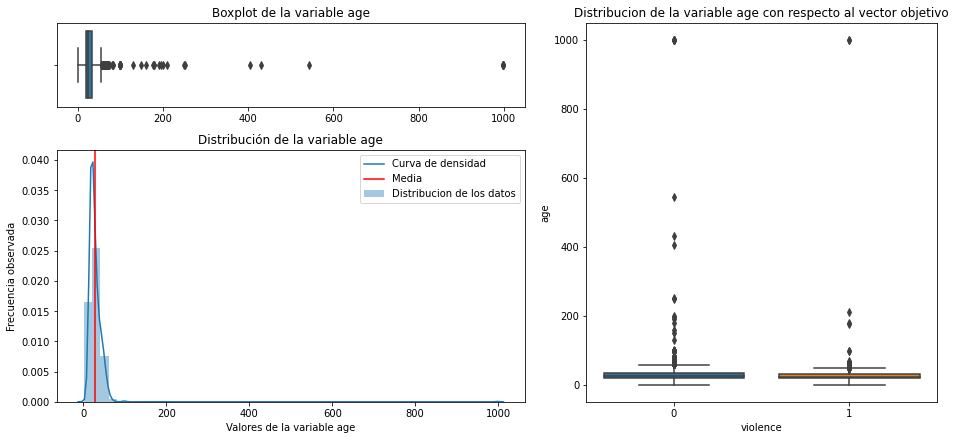

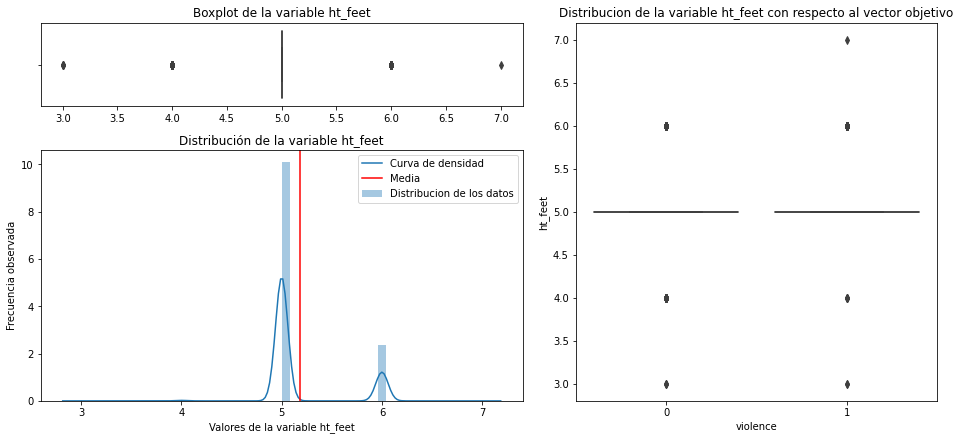

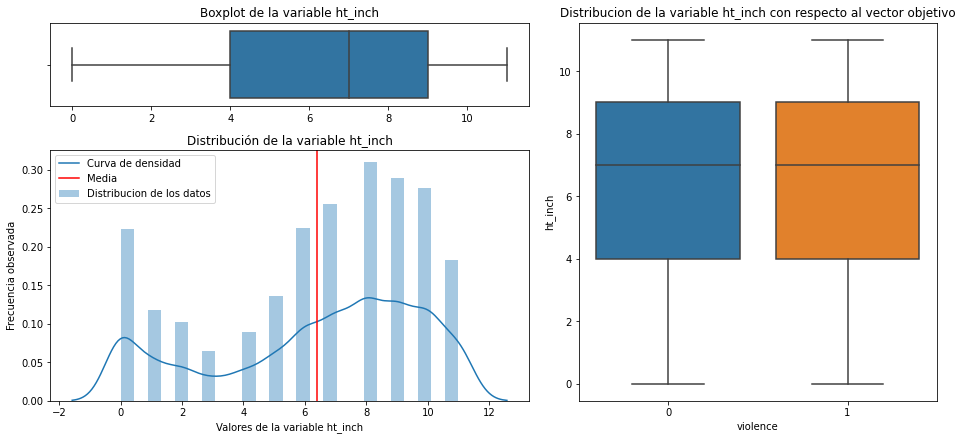

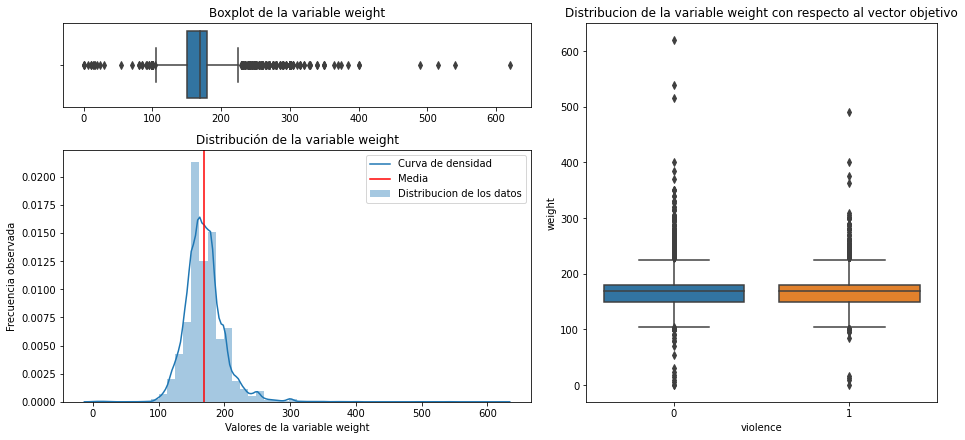

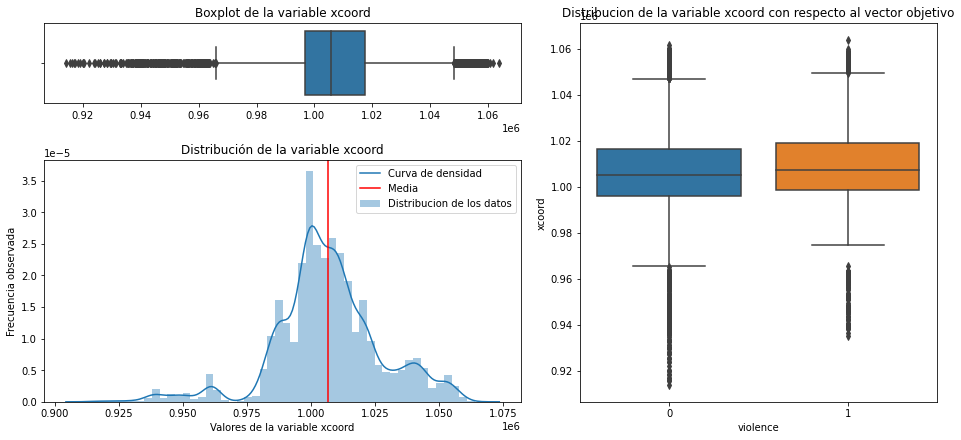

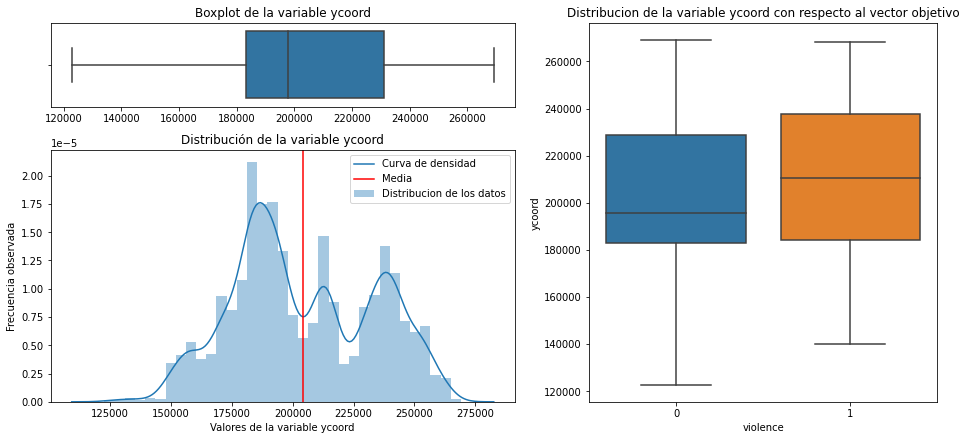

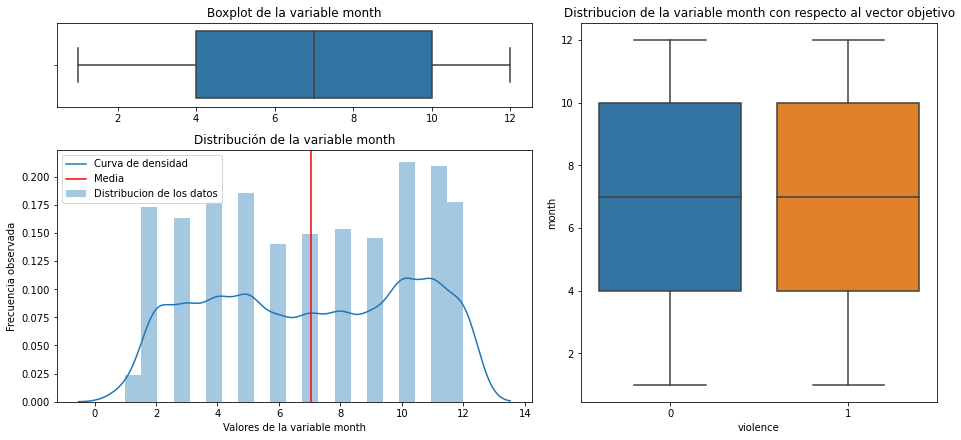

In [33]:
# Revisamos la distribución de las variables numéricas
col = df_filter.select_dtypes(float).columns

for i in col:
    distr_num(df_filter, i, 'violence')

A simple vista, vemos que practicamente las distribuciones para cada una de las categorias es casi la misma. También observamos que hay varios registros anomalos para algunas variables, pero en post de no eliminar registros, serán dejadas tal cual.

Ahora revisamos para las variables categóricas:

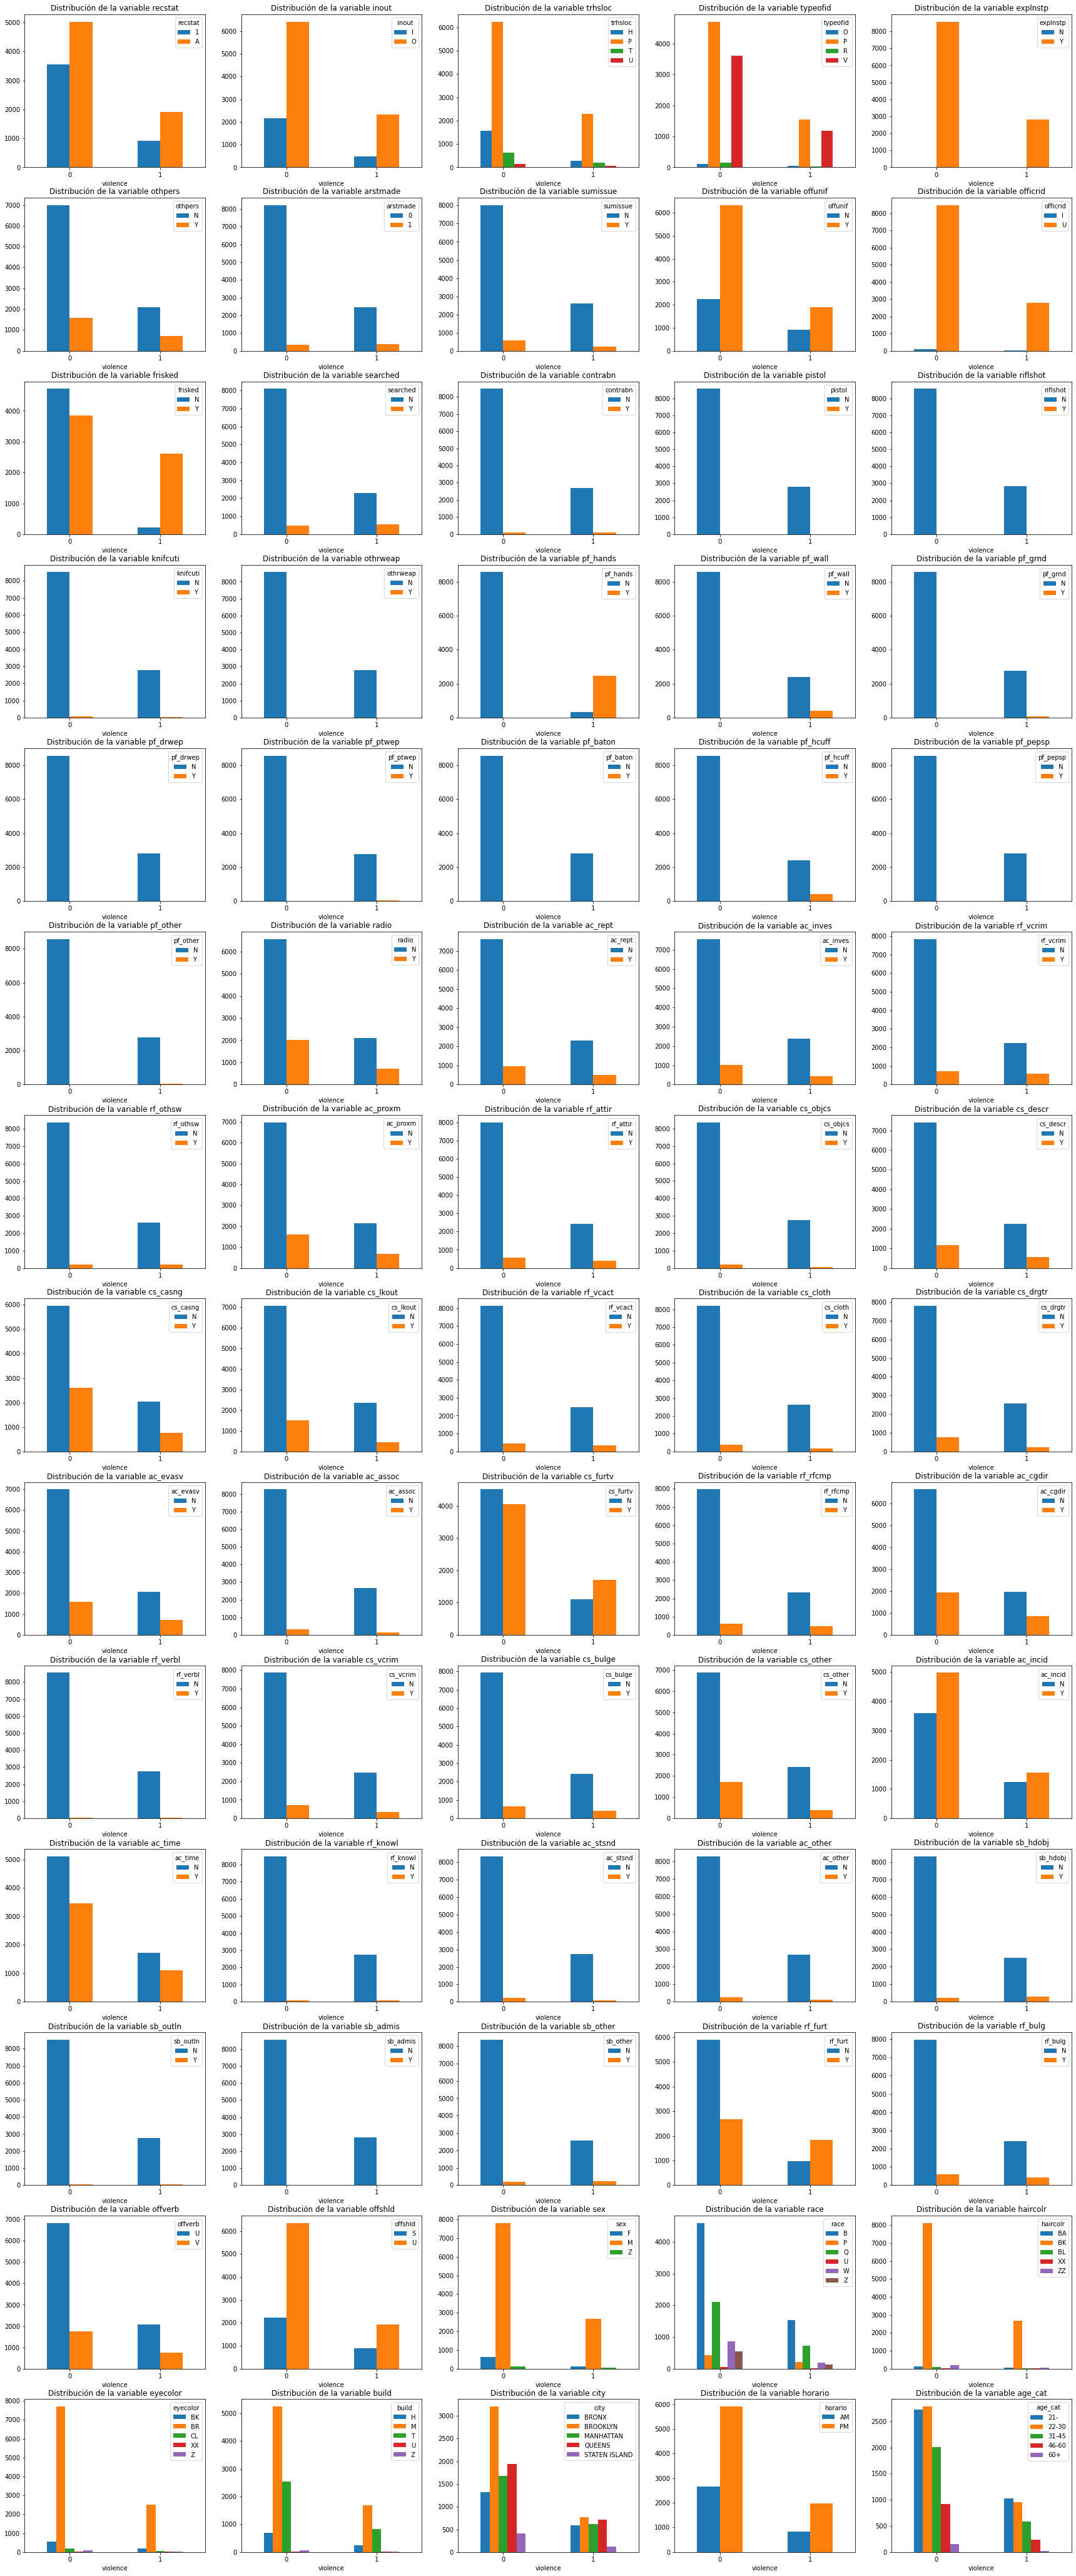

In [34]:
# Llamamos a la función dist_cat para graficar con graficos de barras cada una de las variables categóricas con el vector objetivo
dist_cat(df_filter, 'violence')

Nuevamente, observando cada gráfico, no hay ninguna razón para eliminar variables.

Una vez explorado los datos, nuestra estrategía a seguir será realizar un modelamiento con todas las variables (realizando la recodificaciones necesarias) y ver el comportamiento de sus métricas. Luego de eso, seleccionaremos las variables más importantes a traves de un `features_importante`, y se seleccionarán las importantes y se modelará nuevamente pero solo con esas variables y se analizarán sus métricas.

Ahora, eliminamos algunas variables que no deben ocupar como `datestop`, `timestop`, `dob`, `age`, `ht_inch` y las variables que se ocuparon para crear el target `violence` las cuales son `pf_hands`, `pf_wall`,`pf_grnd`, `pf_drwep`, `pf_ptwep`, `pf_baton`, `pf_hcuff`, `pf_pepsp` y `pf_other`:

In [35]:
# Definimos las variables a eliminar
col_drop = ['datestop','timestop','dob','age','ht_inch', 'pf_hands', 'pf_wall','pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other']

# Eliminamos las variables
df_filter = df_filter.drop(columns=col_drop)

Luego, debemos binarizar las variables, para esto, llamaremos a la función creada `dummies` que para cada variable categorica, realizar un one hot encoding, pero dejando a fuera la variable con menor frecuencia:

In [36]:
# Definimos las variables a binarizar
col_dummies = df_filter.select_dtypes('object').columns

# Binarizamos
df_dummies = dummies(df_filter, col_dummies)

# Eliminamos las variables utilizadas para binarizar 
df_dummies_filter = df_dummies.drop(columns=col_dummies)
df_dummies_filter

,year,pct,perobs,perstop,arstmade,repcmd,revcmd,ht_feet,weight,xcoord,...,build_Z,city_BRONX,city_BROOKLYN,city_MANHATTAN,city_QUEENS,horario_PM,age_cat_21-,age_cat_22-30,age_cat_31-45,age_cat_46-60
0,2009,41.0,1.0,2.0,0,41,41,5.0,145.0,1013067.0,...,0,1,0,0,0,0,0,1,0,0
1,2009,108.0,3.0,5.0,0,108,108,5.0,140.0,1012043.0,...,0,0,0,0,1,0,1,0,0,0
2,2009,43.0,1.0,1.0,0,43,43,6.0,220.0,1017599.0,...,0,1,0,0,0,1,0,1,0,0
3,2009,77.0,5.0,5.0,0,77,77,5.0,120.0,1002625.0,...,0,0,1,0,0,1,0,1,0,0
4,2009,110.0,3.0,10.0,0,110,110,5.0,165.0,1024535.0,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60.0,2.0,2.0,0,801,801,5.0,150.0,989382.0,...,0,0,1,0,0,0,1,0,0,0
6009,2010,75.0,1.0,1.0,0,75,75,5.0,180.0,1012757.0,...,0,0,1,0,0,0,0,1,0,0
6010,2010,123.0,3.0,5.0,0,123,123,6.0,200.0,933868.0,...,0,0,0,0,0,1,1,0,0,0
6011,2010,115.0,1.0,5.0,0,115,115,5.0,185.0,1014722.0,...,0,0,0,0,1,1,1,0,0,0


Finalmente, ya contamos con la data para el modelamiento.

#### **<font color='green'>Modelamiento</font>**

Como debemos realizar dos modelo, crearemos la data de entrenamiento y de testeo para los dos modelos, considerando el año 2009 para el entrenamiento y 2010 para testeo:

In [37]:
# Separamos la data para entrenamiento y para testeo según el año
X_train = df_dummies_filter[df_dummies_filter['year']==2009]
X_test = df_dummies_filter[df_dummies_filter['year']==2010]

In [38]:
# Data para entrenamieto para el vector arstmade
X_train_arstmade = X_train.drop(columns=['arstmade','year'])
X_test_arstmade = X_test.drop(columns=['arstmade','year'])
y_train_arstmade = X_train['arstmade']
y_test_arstmade = X_test['arstmade']

print(f'''Variable arstmade: 
{y_train_arstmade.value_counts(normalize=True)}\n''')

# Data para entrenamieto para el vector violence
X_train_violence = X_train.drop(columns=['arstmade','violence','year'])
X_test_violence = X_test.drop(columns=['arstmade','violence','year'])
y_train_violence = X_train['violence']
y_test_violence = X_test['violence']

print(f'''Variable violence: 
{y_train_violence.value_counts(normalize=True)}''')

Variable arstmade: 
0    0.939507
1    0.060493
Name: arstmade, dtype: float64

Variable violence: 
0    0.749512
1    0.250488
Name: violence, dtype: float64


Claramente, hay un problema de desbalanceo, sobretodo para la variable `arstmade`, por esta vez, no equilibraremos las clases con algún algoritmo como subsmapling, oversampling, smote, etc. Trabajermos la data tal cual está.

Para el modelamiento, realizaremos los modelos mencionado al comienzo del proyecto para revisar que tanto esta afectando el desbalanceo de los datos:

1. Modelos `arstmade`:

Primero, realizamos los modelos sin hiperparámetros:

In [39]:
# Modelo Logistico
arst_logit = LogisticRegression(random_state=42).fit(X_train_arstmade, y_train_arstmade)
# Modelo Naive Bayes
arst_dt = DecisionTreeClassifier(random_state=42).fit(X_train_arstmade, y_train_arstmade)
# Modelo Random Forest
arst_rf = RandomForestClassifier(random_state=42).fit(X_train_arstmade, y_train_arstmade)

Segundo, realizamos los modelos solo con el hiperparámetro `class_weight='balanced'`:

In [40]:
# Modelo Logistico
arst_logit_balanced = LogisticRegression(random_state=42, class_weight ='balanced').fit(X_train_arstmade, y_train_arstmade)
# Modelo Naive Bayes
arst_dt_balanced = DecisionTreeClassifier(random_state=42, class_weight ='balanced').fit(X_train_arstmade, y_train_arstmade)
# Modelo Random Forest
arst_rf_balanced = RandomForestClassifier(random_state=42, class_weight ='balanced').fit(X_train_arstmade, y_train_arstmade)

Por ultimo, implementamos una grilla con los hiperparámetros definidos:

In [41]:
# Modelo logístico con Hiperparámetos 

# Inicializamos el modelo
arst_logit_hp = LogisticRegression(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_logit = GridSearchCV(arst_logit_hp, param_grid = hiper_params)

# Realizamos el fit
arst_grilla_logit.fit(X_train_arstmade, y_train_arstmade)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {arst_grilla_logit.best_estimator_}')
print(f'Mejor puntaje: {arst_grilla_logit.best_score_}')

Mejores hiperparámetros: LogisticRegression(C=0.01, random_state=42)
Mejor puntaje: 0.9395069128483957


In [42]:
# Modelo DecisionTree con Hiperparámetos 

# Inicializamos el modelo
arst_dt_hp = DecisionTreeClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_features': [None,'log2','sqrt'],
    'max_depth': range(1, 20, 4),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_dt = GridSearchCV(arst_dt_hp, param_grid = hiper_params)

# Realizamos el fit
arst_grilla_dt.fit(X_train_arstmade, y_train_arstmade)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {arst_grilla_dt.best_estimator_}')
print(f'Mejor puntaje: {arst_grilla_dt.best_score_}')

Mejores hiperparámetros: DecisionTreeClassifier(max_depth=5, random_state=42)
Mejor puntaje: 0.9643434524596147


In [43]:
# Modelo RandomForest con Hiperparámetos 

# Inicializamos el modelo
arst_rf_hp = RandomForestClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_rf = GridSearchCV(arst_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
arst_grilla_rf.fit(X_train_arstmade, y_train_arstmade)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {arst_grilla_rf.best_estimator_}')
print(f'Mejor puntaje: {arst_grilla_rf.best_score_}')

Mejores hiperparámetros: RandomForestClassifier(max_features=None, n_estimators=90, random_state=42)
Mejor puntaje: 0.9655850332240593


2. Modelos `violence`:

Primero, realizamos los modelos sin hiperparámetros:

In [44]:
# Modelo Logistico
vln_logit = LogisticRegression(random_state=42).fit(X_train_violence, y_train_violence)
# Modelo Random Forest
vln_rf = RandomForestClassifier(random_state=42).fit(X_train_violence, y_train_violence)
# Modelo SVC
vln_svc = SVC(random_state=42).fit(X_train_violence, y_train_violence)
# Modelo Gradient Boosting
vln_gb = GradientBoostingClassifier(random_state=42).fit(X_train_violence, y_train_violence)

Segundo, realizamos los modelos solo con el hiperparámetro `class_weight='balanced'` (el modelo GradientBoostingClassifier no posee este hiperparámetro, asi que no será incluido en esta pasada):

In [45]:
# Modelo Logistico
vln_logit_balanced = LogisticRegression(random_state=42, class_weight ='balanced').fit(X_train_violence, y_train_violence)
# Modelo Random Forest
vln_rf_balanced = RandomForestClassifier(random_state=42, class_weight ='balanced').fit(X_train_violence, y_train_violence)
# Modelo SVC
vln_svc_balanced = SVC(random_state=42, class_weight ='balanced').fit(X_train_violence, y_train_violence)

Por ultimo, implementamos una grilla con los hiperparámetros definidos:

In [46]:
# Modelo logístico con Hiperparámetos 

# Inicializamos el modelo
vln_logit_hp = LogisticRegression(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_logit = GridSearchCV(vln_logit_hp, param_grid = hiper_params)

# Realizamos el fit
vln_grilla_logit.fit(X_train_violence, y_train_violence)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_logit.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_logit.best_score_}')

Mejores hiperparámetros: LogisticRegression(C=0.01, random_state=42)
Mejor puntaje: 0.7495122933539743


In [47]:
# Modelo RandomForest con Hiperparámetos 

# Inicializamos el modelo
vln_rf_hp = RandomForestClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_rf = GridSearchCV(vln_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_rf.fit(X_train_violence, y_train_violence)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_rf.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_rf.best_score_}')

Mejores hiperparámetros: RandomForestClassifier(max_features='sqrt', n_estimators=60, random_state=42)
Mejor puntaje: 0.7857012928845654


In [48]:
# Modelo SVC con Hiperparámetos 

# Inicializamos el modelo
vln_svc_hp = SVC(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'C': [0.001, 0.1, 1, 100],
    'gamma': [0.0001, 0.01, 1, 10],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_svc = GridSearchCV(vln_svc_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_svc.fit(X_train_violence, y_train_violence)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_svc.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_svc.best_score_}')

Mejores hiperparámetros: SVC(C=0.001, class_weight='balanced', gamma=0.0001, random_state=42)
Mejor puntaje: 0.7495121439708397


In [49]:
# Modelo GradientBoosting con Hiperparámetos 

# Inicializamos el modelo
vln_gb_hp = GradientBoostingClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 200, 500],
    'subsample': [0.1, 0.5, 0.9]
}

# Definimos la grilla
vln_grilla_gb = GridSearchCV(vln_gb_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_gb.fit(X_train_violence, y_train_violence)

# Vemos los mejores parámetros de la grilla
print(f'Mejores hiperparámetros: {vln_grilla_gb.best_estimator_}')
print(f'Mejor puntaje: {vln_grilla_gb.best_score_}')

Mejores hiperparámetros: GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.9)
Mejor puntaje: 0.7816212026724263


In [50]:
# Modelo Voting con Hiperparámetos 
estimators = [
    ('Logistic Grilla', vln_grilla_logit.best_estimator_),
    ('RandomForest Grilla', vln_grilla_rf.best_estimator_),
    ('SVC Grilla', vln_grilla_svc.best_estimator_),
    ('GradientBoosting Grilla ', vln_grilla_gb.best_estimator_)
]

voting_model = VotingClassifier(estimators).fit(X_train_violence, y_train_violence)

#### **<font color='green'>Evaluación del modelamiento</font>**

Ahora, revisaremos la tabla del `classification_report` y el gráfico de champions challenge para ver el mejor modelo. Dado que estamos con las clases equilibradas, debemos fijarnos en la precision, recall y f1-score de cada clase.

1. Modelos `arstmade`:

In [51]:
# Mostramos las métricas de los modelos sin hiperparámetros
y_pred_logit = arst_logit.predict(X_test_arstmade)
y_pred_dt = arst_dt.predict(X_test_arstmade)
y_pred_rf = arst_rf.predict(X_test_arstmade)

print(f'''Modelo logistico: 
{classification_report(y_test_arstmade, y_pred_logit)}''')
print(f'''Modelo arbol decision: 
{classification_report(y_test_arstmade, y_pred_dt)}''')
print(f'''Modelo random forest: 
{classification_report(y_test_arstmade, y_pred_rf)}''')


# Mostramos las métricas de los modelos con el hiperparámetro class_weight
y_pred_logit = arst_logit_balanced.predict(X_test_arstmade)
y_pred_dt = arst_dt_balanced.predict(X_test_arstmade)
y_pred_rf = arst_rf_balanced.predict(X_test_arstmade)

print(f'''Modelo logistico: 
{classification_report(y_test_arstmade, y_pred_logit)}''')
print(f'''Modelo arbol decision: 
{classification_report(y_test_arstmade, y_pred_dt)}''')
print(f'''Modelo random forest: 
{classification_report(y_test_arstmade, y_pred_rf)}''')


# Mostramos las métricas de los modelos con hiperparámetros
y_pred_logit = arst_grilla_logit.best_estimator_.predict(X_test_arstmade)
y_pred_dt = arst_grilla_dt.best_estimator_.predict(X_test_arstmade)
y_pred_rf = arst_grilla_rf.best_estimator_.predict(X_test_arstmade)

print(f'''Modelo logistico: 
{classification_report(y_test_arstmade, y_pred_logit)}''')
print(f'''Modelo arbol decision: 
{classification_report(y_test_arstmade, y_pred_dt)}''')
print(f'''Modelo random forest: 
{classification_report(y_test_arstmade, y_pred_rf)}''')

Modelo logistico: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5374
           1       0.00      0.00      0.00       376

    accuracy                           0.93      5750
   macro avg       0.47      0.50      0.48      5750
weighted avg       0.87      0.93      0.90      5750

Modelo arbol decision: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5374
           1       0.49      0.54      0.51       376

    accuracy                           0.93      5750
   macro avg       0.73      0.75      0.74      5750
weighted avg       0.94      0.93      0.93      5750

Modelo random forest: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5374
           1       0.86      0.57      0.68       376

    accuracy                           0.97      5750
   macro avg       0.91      0.78      0.83      5750
weighted

In [52]:
# Se crea un diccionario con los modelos a competir
estimators = [
    ('Logistic s/Hiperparámetros', arst_logit),
    ('Logistic balanced', arst_logit_balanced),
    ('Logistic c/Hiperparámetros', arst_grilla_logit.best_estimator_),
    ('TreeDecision s/Hiperparámetros', arst_dt),
    ('TreeDecision balanced', arst_dt_balanced),
    ('TreeDecisions c/Hiperparámetros', arst_grilla_dt.best_estimator_),
    ('RanfomForest s/Hiperparámetros', arst_rf),
    ('RanfomForest balanced', arst_rf_balanced),
    ('RanfomForest c/Hiperparámetros', arst_grilla_rf.best_estimator_),
]

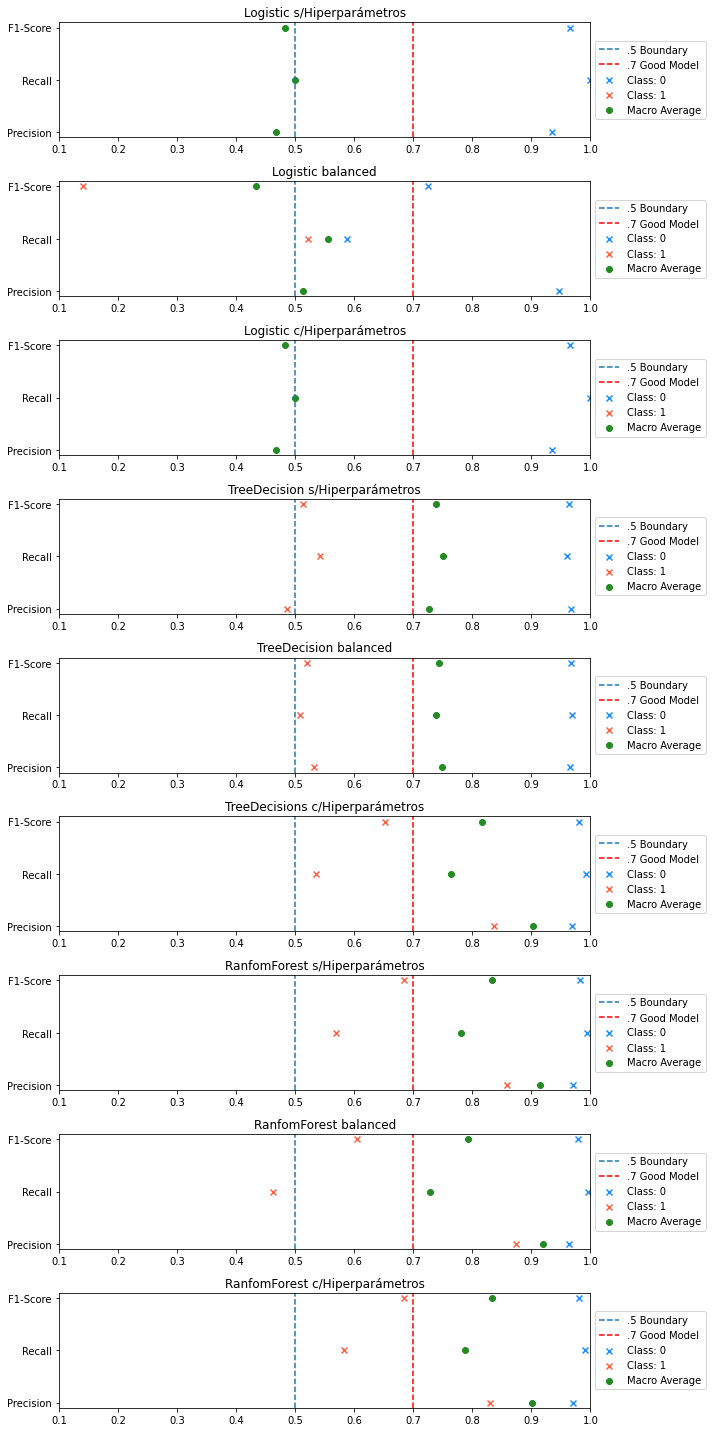

In [53]:
# Graficamos los score de los modelos con la función plot_classification_report
plt.figure(figsize=(10, 20))
for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].predict(X_test_arstmade)
    plot_classification_report(y_test_arstmade, class_pred)
    plt.axvline(.5, label='.5 Boundary', linestyle='--')
    plt.axvline(.7, label='.7 Good Model', linestyle='--', color='Red')
    plt.xlim((0.1, 1.0))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

Observando el output del `classification_report` y el champion challenge, podemos llegar a la conclusión que los mejores modelos son el `RandomForest sin hiperparámetros` y `RandomForest con hiperparámetros`, ya que en terminos de presicion, recall y f1-score, son los que poseen las mejores métricas. Veremos en detalle estas métricas: 

In [54]:
# Mostramos las métricas del modelo RandomForest sin hiperparámetros
y_pred_rf = arst_rf_balanced.predict(X_test_arstmade)
print(f'''Modelo ganador: RandomForest sin hiperparámetros 
{classification_report(y_test_arstmade, y_pred_rf)}''')

# Mostramos las métricas del modelo RandomForest con hiperparámetros
y_pred_rf_grilla = arst_grilla_rf.predict(X_test_arstmade)
print(f'''Modelo ganador: RandomForest con hiperparámetros 
{classification_report(y_test_arstmade, y_pred_rf_grilla)}''')

Modelo ganador: RandomForest sin hiperparámetros 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5374
           1       0.87      0.46      0.61       376

    accuracy                           0.96      5750
   macro avg       0.92      0.73      0.79      5750
weighted avg       0.96      0.96      0.95      5750

Modelo ganador: RandomForest con hiperparámetros 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5374
           1       0.83      0.58      0.68       376

    accuracy                           0.96      5750
   macro avg       0.90      0.79      0.83      5750
weighted avg       0.96      0.96      0.96      5750



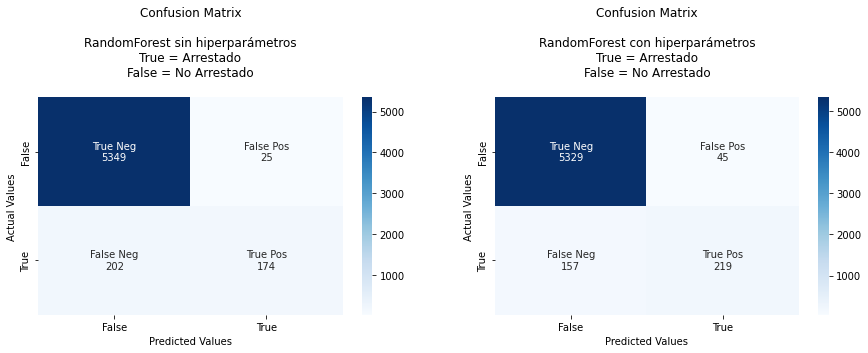

In [55]:
plt.figure(figsize=(15,4))

# Matriz de confusión RandomForest sin hiperparámetros
plt.subplot(1,2,1)
matriz_confusion(y_test_arstmade, y_pred_rf, title='Confusion Matrix\n\nRandomForest sin hiperparámetros\nTrue = Arrestado\nFalse = No Arrestado\n')

# Matriz de confusión RandomForest con hiperparámetros
plt.subplot(1,2,2)
matriz_confusion(y_test_arstmade, y_pred_rf_grilla, title='Confusion Matrix\n\nRandomForest con hiperparámetros\nTrue = Arrestado\nFalse = No Arrestado\n')

En base al mejor modelo, responderemos la siguiente pregunta: ¿cuál es probabilidad de que un individuo sea arrestado en uno de los cinco barrios, condicional al género y a la raza?. Para esto obtendremos las predicciones en términos de probabilidad (ocuparemos solo el dataset de testeo para realizar este ejercicio):

In [56]:
# Obtenemos las predicciones en terminos de probabilidad
y_pred_prob_rf = arst_rf.predict_proba(X_test_arstmade)

# Obtenemos la data de testeo donde se encuentran las variables originales y recodificadas
df_test = df_dummies[df_dummies['year']==2010]

# Adjuntamos las probabilidades de cada clase
df_test['prob_0'] = y_pred_prob_rf[:,0] 
df_test['prob_1'] = y_pred_prob_rf[:,1]

In [57]:
# Sacamos los registros Z y U que corresponden a categorias no definidas
df_test = df_test[(df_test!='Z') & (df_test!='U')]

# Recodificamos la variables sexo para que sea mas entendible
sex = ['F','M']
sex_recod = ['Femenino','Masculino']
df_test['sex'] = df_test['sex'].replace(sex,sex_recod)

# Recodificamos la variables race para que sea mas entendible
race = ['B','P','Q','W']
race_recod = ['BLACK','BLACK-HISPANIC','WHITE-HISPANIC','WHITE']
df_test['race'] = df_test['race'].replace(race,race_recod)
df_test['race_RECOD'] = df_test['race'].replace(['BLACK-HISPANIC','WHITE-HISPANIC'],['BLACK','WHITE'])

# Vemos una mirada general de las mayores probabilidades para estas 3 caracteristicas
df_prob = pd.DataFrame(df_test.groupby(['race','sex','city'])['prob_1'].mean()).reset_index().sort_values(by='prob_1',ascending=False)
df_prob.head(10)

,race,sex,city,prob_1
12,BLACK-HISPANIC,Femenino,MANHATTAN,0.306667
22,WHITE,Femenino,MANHATTAN,0.267692
0,BLACK,Femenino,BRONX,0.170000
20,WHITE,Femenino,BRONX,0.148182
2,BLACK,Femenino,MANHATTAN,0.136563
27,WHITE,Masculino,MANHATTAN,0.122525
37,WHITE-HISPANIC,Masculino,MANHATTAN,0.099530
7,BLACK,Masculino,MANHATTAN,0.093702
21,WHITE,Femenino,BROOKLYN,0.087059
9,BLACK,Masculino,STATEN ISLAND,0.083694


In [58]:
# Obtenemos las mayores probabilidades para cada cuidad condicionado por la raza y sexo
df_prob = pd.DataFrame(df_test.groupby(['race','sex','city'])['prob_1'].mean()).reset_index().sort_values(by='prob_1',ascending=False)

df_prob['rank'] = df_prob.groupby('city')['prob_1'].rank(ascending=False)
df_prob = df_prob[df_prob['rank'] == 1]
df_prob

,race,sex,city,prob_1,rank
12,BLACK-HISPANIC,Femenino,MANHATTAN,0.306667,1.0
0,BLACK,Femenino,BRONX,0.170000,1.0
21,WHITE,Femenino,BROOKLYN,0.087059,1.0
9,BLACK,Masculino,STATEN ISLAND,0.083694,1.0
28,WHITE,Masculino,QUEENS,0.081463,1.0


In [59]:
# Obtenemos las mayores probabilidades para cada cuidad condicionado por la raza y sexo, pero ahora con la variable race recodificada
df_prob = pd.DataFrame(df_test.groupby(['race_RECOD','sex','city'])['prob_1'].mean()).reset_index().sort_values(by='prob_1',ascending=False)

df_prob['rank'] = df_prob.groupby('city')['prob_1'].rank(ascending=False)
df_prob = df_prob[df_prob['rank'] == 1]
df_prob

,race_RECOD,sex,city,prob_1,rank
12,WHITE,Femenino,MANHATTAN,0.151515,1.0
0,BLACK,Femenino,BRONX,0.147674,1.0
9,BLACK,Masculino,STATEN ISLAND,0.078595,1.0
8,BLACK,Masculino,QUEENS,0.065475,1.0
11,WHITE,Femenino,BROOKLYN,0.062703,1.0


En terminos generales, con estas dos miradas con la reza sin recodificar y recodificada, las mayores probabilidades se obtienen para la gente de raza negra femenina, siendo en MANHATTAN y BRONX donde estan las mayores probabilidades de arresto para estas caracteristicas.

Ahora, para este modelo, veremos las variables mas importantes:

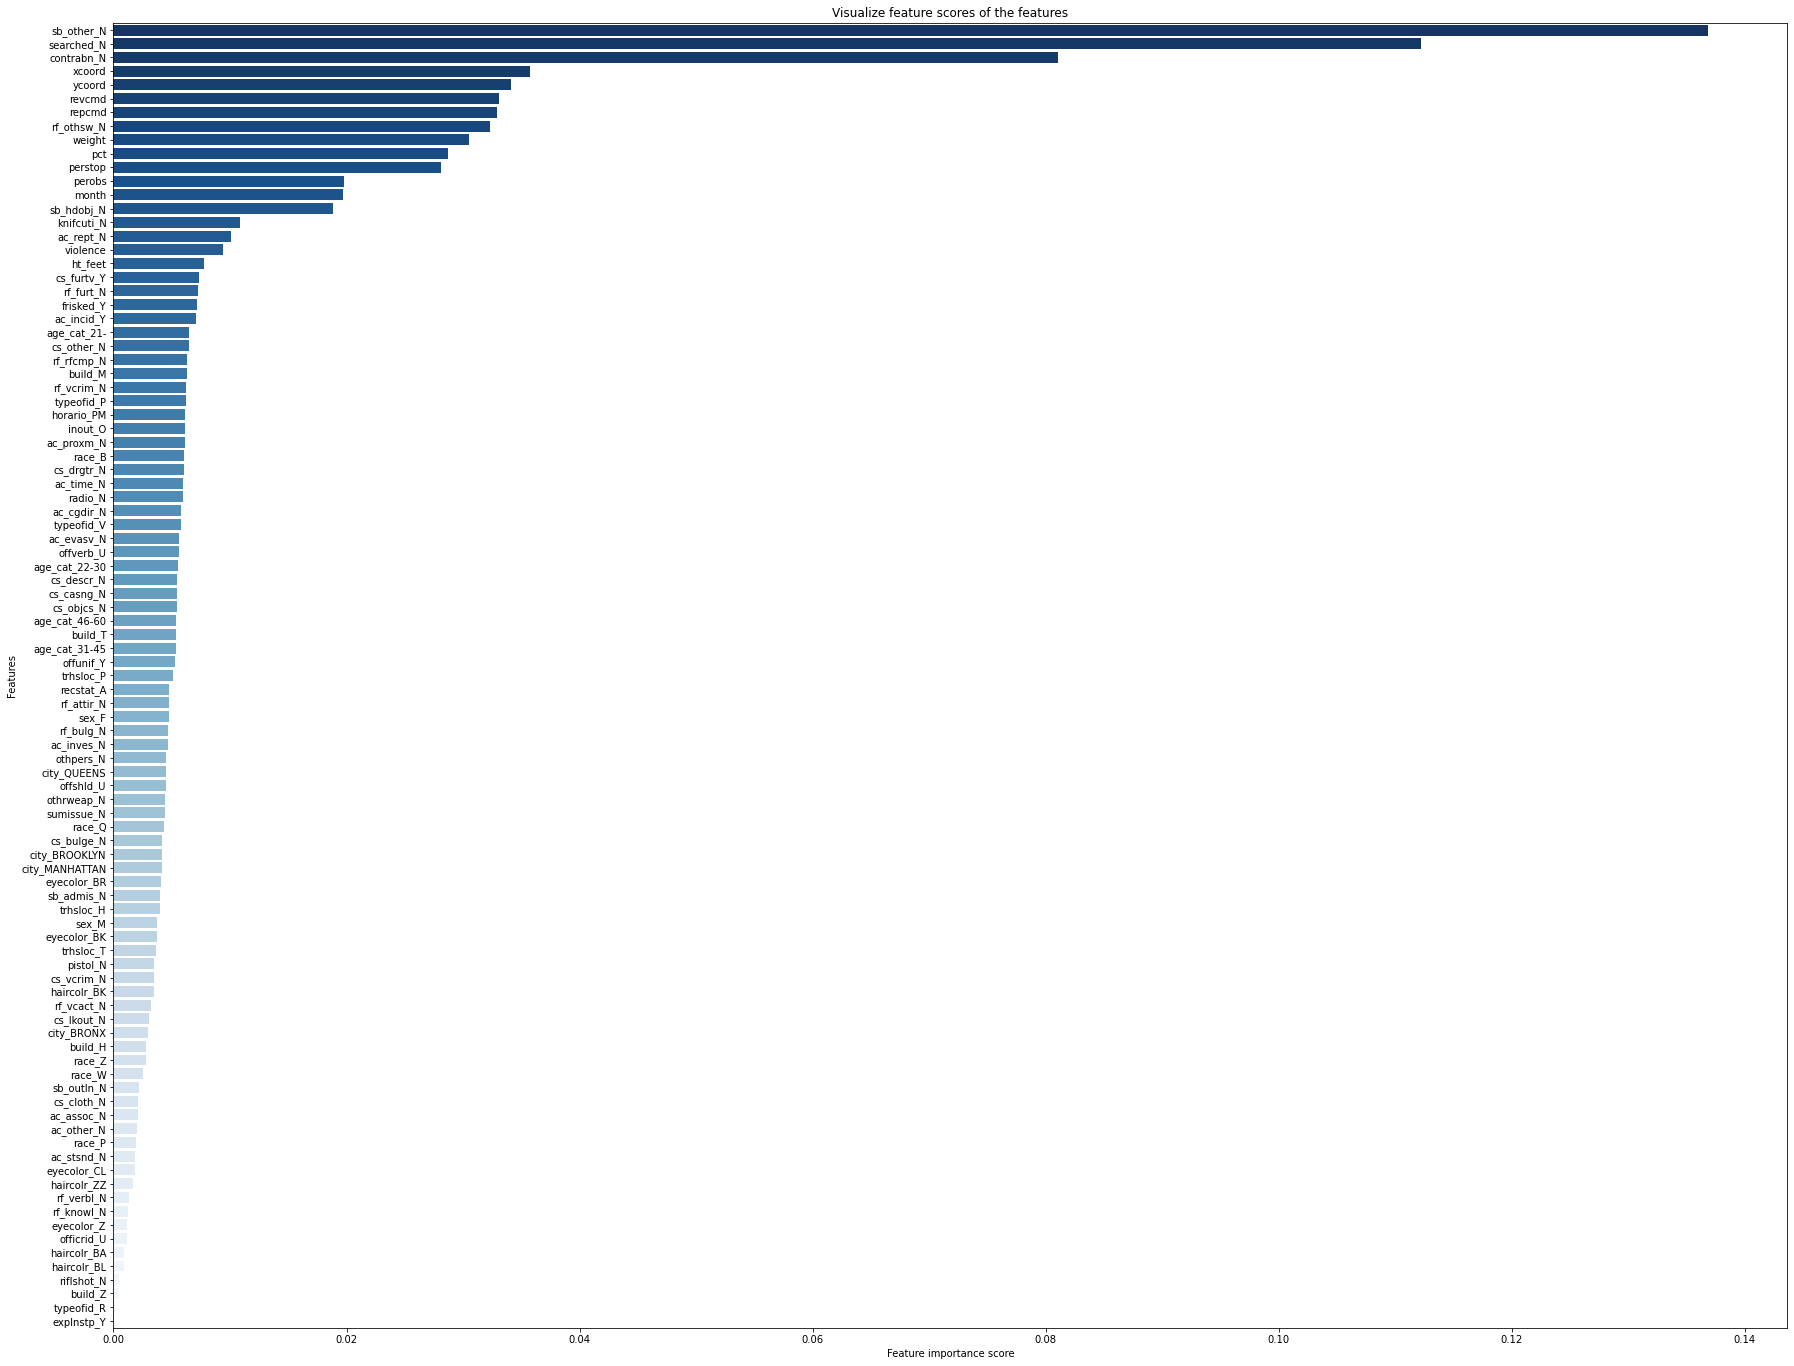

In [60]:
# Obtenemos los score de cada variable
feature_scores_arst = pd.Series(arst_rf.feature_importances_, index=X_train_arstmade.columns).sort_values(ascending=False)

# Realizamos el gráfico de Features Importance
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_arst, y=feature_scores_arst.index, data=df, palette = 'Blues_r')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_arst.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Observamos que las caracteristicas que más influyen son `sb_other`, `searched`, `contrabn`, `xcoord`, `ycoord`. Es interesante observar que las variables de coordenadas están en esta lista ya que nos indica que influye mucho el lugar para ser arrestado.

2. Modelos `violence`:

In [61]:
# Mostramos las métricas de los modelos sin hiperparámetros
y_pred_logit = vln_logit.predict(X_test_violence)
y_pred_rf = vln_rf.predict(X_test_violence)
y_pred_svc = vln_svc.predict(X_test_violence)
y_pred_gb = vln_gb.predict(X_test_violence)

print(f'''Modelo logistico: 
{classification_report(y_test_violence, y_pred_logit)}''')
print(f'''Modelo Random Forest: 
{classification_report(y_test_violence, y_pred_rf)}''')
print(f'''Modelo SVC: 
{classification_report(y_test_violence, y_pred_svc)}''')
print(f'''Modelo Gradient Boosting: 
{classification_report(y_test_violence, y_pred_gb)}''')


# Mostramos las métricas de los modelos con el hiperparámetro class_weight
y_pred_logit = vln_logit_balanced.predict(X_test_violence)
y_pred_rf = vln_rf_balanced.predict(X_test_violence)
y_pred_svc = vln_svc_balanced.predict(X_test_violence)

print(f'''Modelo logistico: 
{classification_report(y_test_violence, y_pred_logit)}''')
print(f'''Modelo Random Forest: 
{classification_report(y_test_violence, y_pred_rf)}''')
print(f'''Modelo SVC: 
{classification_report(y_test_violence, y_pred_svc)}''')

# Mostramos las métricas de los modelos con hiperparámetros
y_pred_logit = vln_grilla_logit.best_estimator_.predict(X_test_violence)
y_pred_rf = vln_grilla_rf.best_estimator_.predict(X_test_violence)
y_pred_svc = vln_grilla_svc.best_estimator_.predict(X_test_violence)
y_pred_gb = vln_grilla_gb.best_estimator_.predict(X_test_violence)
y_pred_vt = voting_model.predict(X_test_violence)

print(f'''Modelo logistico: 
{classification_report(y_test_violence, y_pred_logit)}''')
print(f'''Modelo Random Forest: 
{classification_report(y_test_violence, y_pred_rf)}''')
print(f'''Modelo SVC: 
{classification_report(y_test_violence, y_pred_svc)}''')
print(f'''Modelo Gradient Boosting: 
{classification_report(y_test_violence, y_pred_gb)}''')
print(f'''Modelo Voting: 
{classification_report(y_test_violence, y_pred_vt)}''')

Modelo logistico: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4347
           1       0.00      0.00      0.00      1403

    accuracy                           0.76      5750
   macro avg       0.38      0.50      0.43      5750
weighted avg       0.57      0.76      0.65      5750

Modelo Random Forest: 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4347
           1       0.61      0.31      0.41      1403

    accuracy                           0.78      5750
   macro avg       0.71      0.62      0.64      5750
weighted avg       0.76      0.78      0.76      5750

Modelo SVC: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4347
           1       0.00      0.00      0.00      1403

    accuracy                           0.76      5750
   macro avg       0.38      0.50      0.43      5750
weighted avg       

In [62]:
# Se crea un diccionario con los modelos a competir
estimators = [
    ('Logistic s/Hiperparámetros', vln_logit),
    ('Logistic balanced', vln_logit_balanced),
    ('Logistic c/Hiperparámetros', vln_grilla_logit.best_estimator_),
    ('RanfomForest s/Hiperparámetros', vln_rf),
    ('RanfomForest balanced', vln_rf_balanced),
    ('RanfomForest c/Hiperparámetros', vln_grilla_rf.best_estimator_),
    ('SVC s/Hiperparámetros', vln_svc),
    ('SVC balanced', vln_svc_balanced),
    ('SVC c/Hiperparámetros', vln_grilla_svc.best_estimator_),
    ('Gradient Boosting s/Hiperparámetros', vln_gb),
    ('Gradient Boosting c/Hiperparámetros', vln_grilla_gb.best_estimator_),
    ('VotingClassifier', voting_model)
]

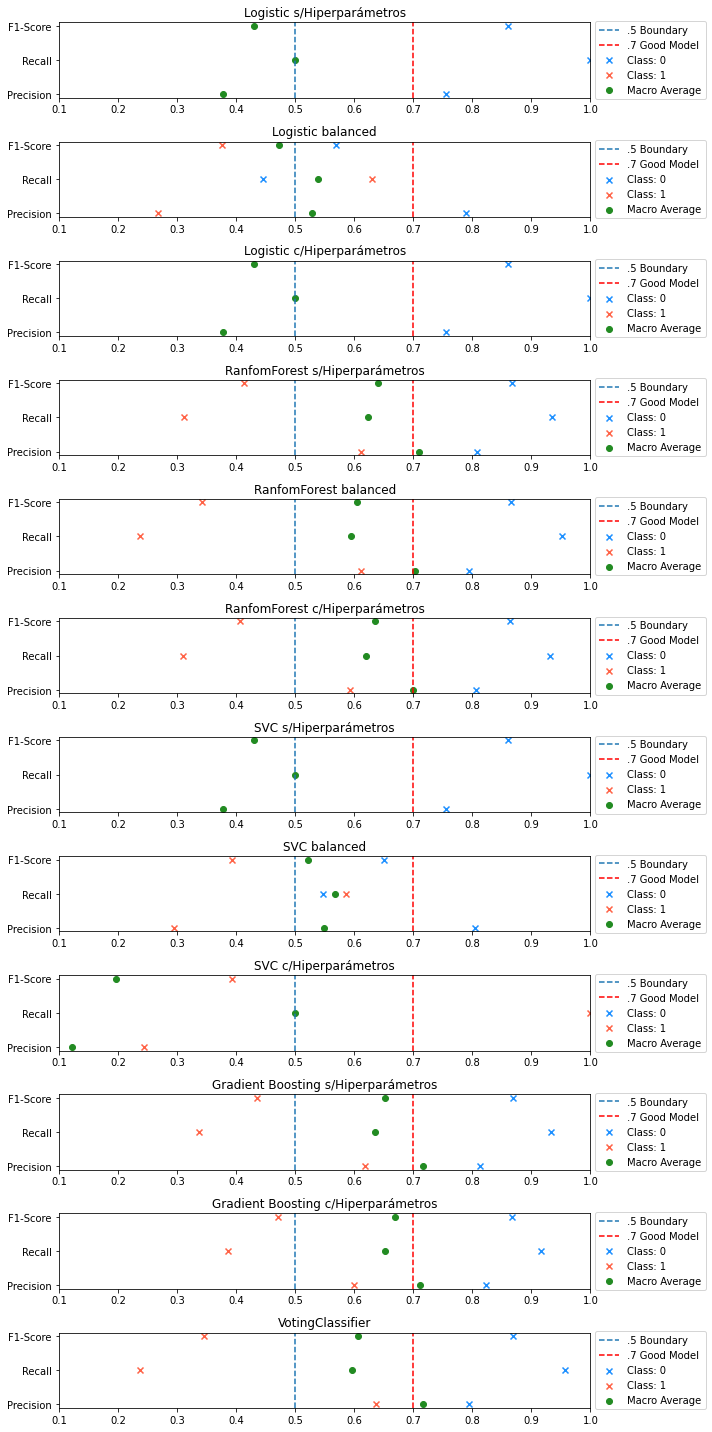

In [63]:
# Graficamos los score de los modelos con la función plot_classification_report
plt.figure(figsize=(10, 20))
for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].predict(X_test_violence)
    plot_classification_report(y_test_violence, class_pred)
    plt.axvline(.5, label='.5 Boundary', linestyle='--')
    plt.axvline(.7, label='.7 Good Model', linestyle='--', color='Red')
    plt.xlim((0.1, 1.0))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

En terminos generales, no tenemos muy buenos modelos, pero si el mejor de todos, comparando todas sus métricas, es el `GradientBoosting con hiperparámetros` , ya que en terminos de presicion, recall y f1-score, es el que posee las mejores métricas. Veremos en detalle estas métricas: 

Modelo ganador: GradientBoosting con hiperparámetros 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4347
           1       0.60      0.39      0.47      1403

    accuracy                           0.79      5750
   macro avg       0.71      0.65      0.67      5750
weighted avg       0.77      0.79      0.77      5750



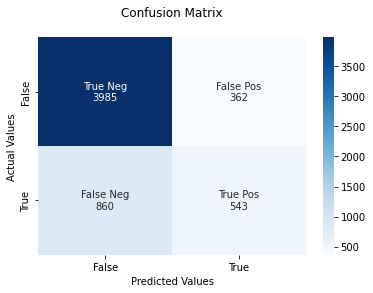

In [64]:
# Mostramos las métricas del modelo RandomForest
y_pred_gb = vln_grilla_gb.best_estimator_.predict(X_test_violence)
print(f'''Modelo ganador: GradientBoosting con hiperparámetros 
{classification_report(y_test_violence, y_pred_gb)}''')

# Matriz de confusión
matriz_confusion(y_test_violence, y_pred_gb)

Ahora, para este modelo, veremos las variables mas importantes:

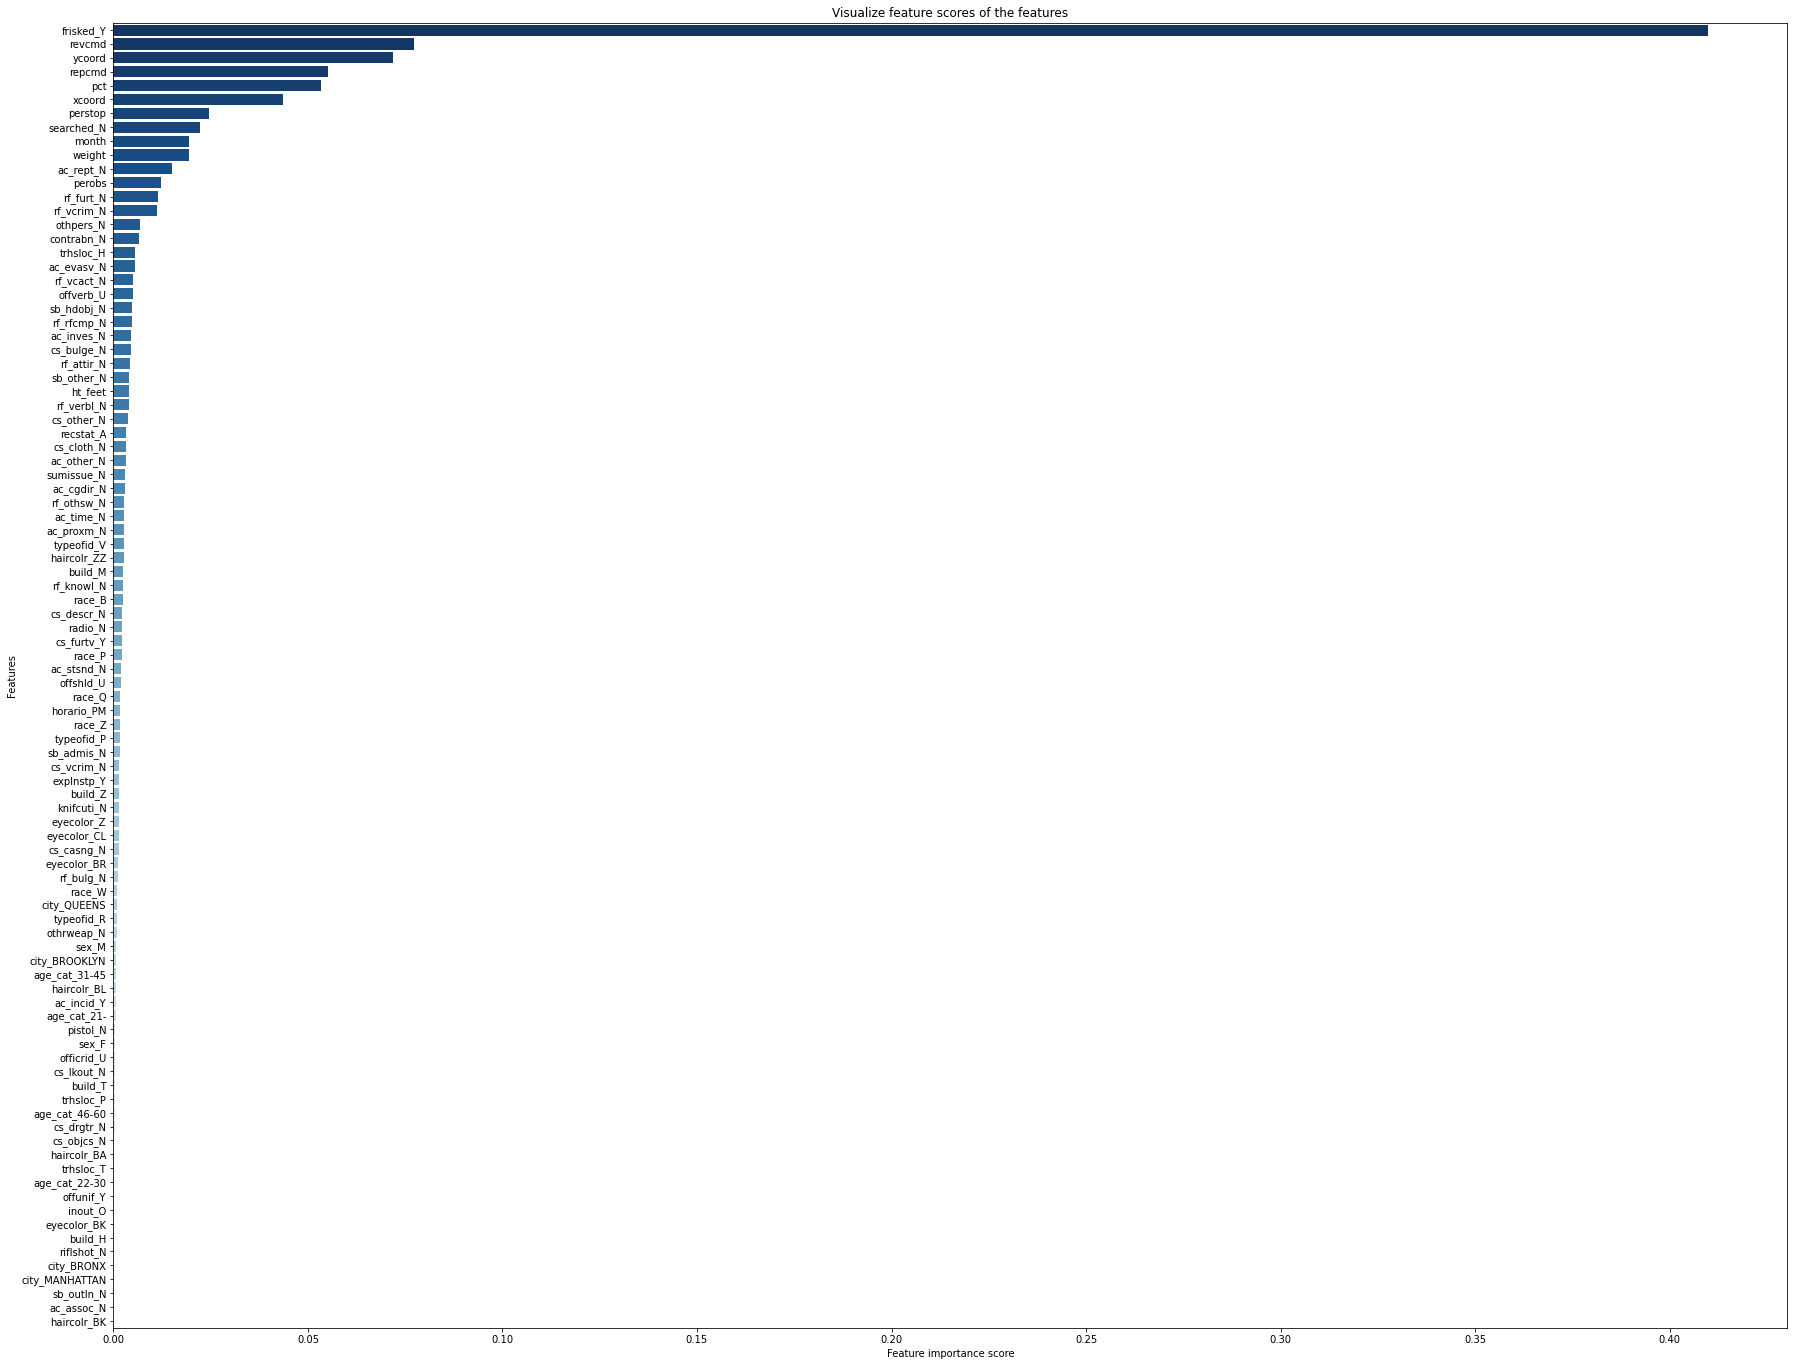

In [65]:
# Obtenemos los score de cada variable
feature_scores_vln = pd.Series(vln_grilla_gb.best_estimator_.feature_importances_, index=X_train_violence.columns).sort_values(ascending=False)

# Realizamos el gráfico de Features Importance
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_vln, y=feature_scores_vln.index, data=df, palette = 'Blues_r')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_vln.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Observamos que las caracteristicas que más influyen son `frisked`, `revcmd`, `ycoord`, `repcmd`, `pct`.

Durante el análisis, hemos podido observar que hay varias cosas las que podemos mejorar para el siguiente hito. En general, para el siguiente hito se probará lo siguiente para ver si es posible mejorar las métricas:

- Lo que se hará será modelar con la data equilibrada, ocupando alguna técnica para el balanceo (ya sea oversamplig o subsampling), y se comparará con los anteriores para ver si hubo mejoras en las métricas. Luego, para el mejor modelo en general, se probará entrenando el mismo modelo con los mismo parámetros pero con un set acotado de variables (las más importantes) y con eso se compará cual es el mejor.

Esto se aplicará para los dos modelos, pero dandole un mayor énfasis al modelo `violence` ya que este no obtuvo muy buenas métricas.


## <font color='green'>**Hito 3:**</font>

#### **<font color='green'>Modelación segunda y tercera iteración</font>**

Como se mencionó al final del hito 2, para los dos modelos, se hará en equilibrio en las clases con el fin de obtener mejores métricas; pero antes, se probará si es posible obtener las mismas métricas con un set acotado de variables. Para eso, ocuparemos las caracteristicas más influyentes según el grafico de `importance_features`. En caso de que logremos tener métricas similares con pocas variables, realizaremos el balanceo con ese set acotado de variables.

1. Modelos `arstmade`:

Para este modelo, se hicieron varias pruebas, donde lo mejor que se obtuvo fue tomando las primeras 3 variables más influyentes.

In [66]:
# Definimos las caracteristicas más importantes
names_importance = feature_scores_arst.index[:3]

# Data para entrenamieto para el vector arstmade
X_train_arstmade2 = X_train[names_importance]
X_test_arstmade2 = X_test[names_importance]

Primero, realizamos los modelos sin hiperparámetros:

In [67]:
# Modelo Logistico
arst_logit2 = LogisticRegression(random_state=42).fit(X_train_arstmade2, y_train_arstmade)
# Modelo Naive Bayes
arst_dt2 = DecisionTreeClassifier(random_state=42).fit(X_train_arstmade2, y_train_arstmade)
# Modelo Random Forest
arst_rf2 = RandomForestClassifier(random_state=42).fit(X_train_arstmade2, y_train_arstmade)

Segundo, realizamos los modelos solo con el hiperparámetro `class_weight='balanced'`:

In [68]:
# Modelo Logistico
arst_logit_balanced2 = LogisticRegression(random_state=42, class_weight ='balanced').fit(X_train_arstmade2, y_train_arstmade)
# Modelo Naive Bayes
arst_dt_balanced2 = DecisionTreeClassifier(random_state=42, class_weight ='balanced').fit(X_train_arstmade2, y_train_arstmade)
# Modelo Random Forest
arst_rf_balanced2 = RandomForestClassifier(random_state=42, class_weight ='balanced').fit(X_train_arstmade2, y_train_arstmade)

Por último, implementamos una grilla con los hiperparámetros definidos:

In [69]:
# Modelo logístico con Hiperparámetos 

# Inicializamos el modelo
arst_logit_hp = LogisticRegression(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_logit2 = GridSearchCV(arst_logit_hp, param_grid = hiper_params)

# Realizamos el fit
arst_grilla_logit2.fit(X_train_arstmade2, y_train_arstmade)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [70]:
# Modelo DecisionTree con Hiperparámetos 

# Inicializamos el modelo
arst_dt_hp = DecisionTreeClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_features': [None,'log2','sqrt'],
    'max_depth': range(1, 20, 4),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_dt2 = GridSearchCV(arst_dt_hp, param_grid = hiper_params)

# Realizamos el fit
arst_grilla_dt2.fit(X_train_arstmade2, y_train_arstmade)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 20, 4),
                         'max_features': [None, 'log2', 'sqrt']})

In [71]:
# Modelo RandomForest con Hiperparámetos 

# Inicializamos el modelo
arst_rf_hp = RandomForestClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
arst_grilla_rf2 = GridSearchCV(arst_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
arst_grilla_rf2.fit(X_train_arstmade2, y_train_arstmade)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': range(10, 100, 10)})

Ahora, mostramos las métricas:

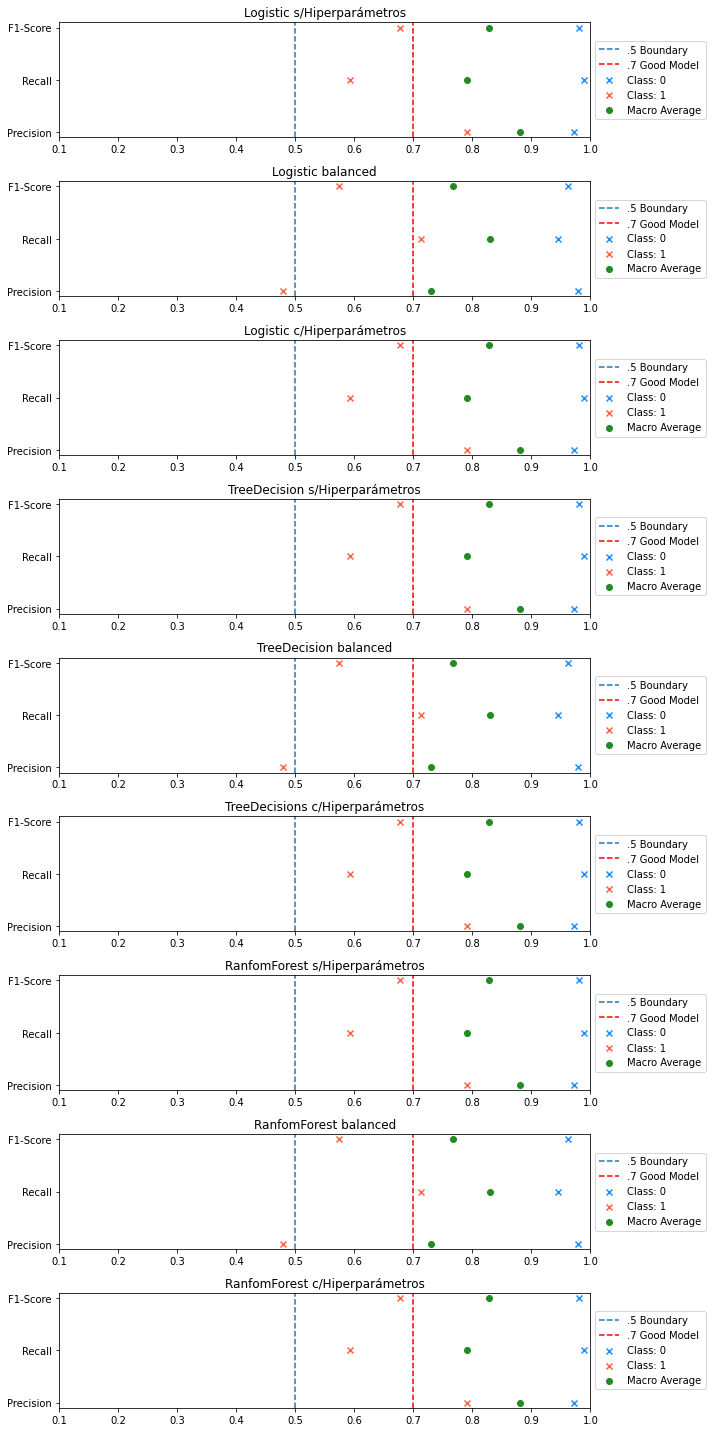

In [72]:
# Se crea un diccionario con los modelos a competir
estimators = [
    ('Logistic s/Hiperparámetros', arst_logit2),
    ('Logistic balanced', arst_logit_balanced2),
    ('Logistic c/Hiperparámetros', arst_grilla_logit2.best_estimator_),
    ('TreeDecision s/Hiperparámetros', arst_dt2),
    ('TreeDecision balanced', arst_dt_balanced2),
    ('TreeDecisions c/Hiperparámetros', arst_grilla_dt2.best_estimator_),
    ('RanfomForest s/Hiperparámetros', arst_rf2),
    ('RanfomForest balanced', arst_rf_balanced2),
    ('RanfomForest c/Hiperparámetros', arst_grilla_rf2.best_estimator_),
]

# Graficamos los score de los modelos con la función plot_classification_report
plt.figure(figsize=(10, 20))
for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].predict(X_test_arstmade2)
    plot_classification_report(y_test_arstmade, class_pred)
    plt.axvline(.5, label='.5 Boundary', linestyle='--')
    plt.axvline(.7, label='.7 Good Model', linestyle='--', color='Red')
    plt.xlim((0.1, 1.0))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

análizando los resultados obtenidos, obtenermos las mismas métricas en los 3 modelos sin hiperparámetros, las cuales son precisamente las mejores en todas las iteraciones. Acá una muestra de los 3 modelos sin hiperparametros:

In [73]:
# Mostramos las métricas de los modelos sin hiperparámetros
y_pred_logit = arst_logit2.predict(X_test_arstmade2)
y_pred_dt = arst_dt2.predict(X_test_arstmade2)
y_pred_rf = arst_rf2.predict(X_test_arstmade2)

print(f'''Modelo logistico: 
{classification_report(y_test_arstmade, y_pred_logit)}''')
print(f'''Modelo arbol decision: 
{classification_report(y_test_arstmade, y_pred_dt)}''')
print(f'''Modelo random forest: 
{classification_report(y_test_arstmade, y_pred_rf)}''')

Modelo logistico: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5374
           1       0.79      0.59      0.68       376

    accuracy                           0.96      5750
   macro avg       0.88      0.79      0.83      5750
weighted avg       0.96      0.96      0.96      5750

Modelo arbol decision: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5374
           1       0.79      0.59      0.68       376

    accuracy                           0.96      5750
   macro avg       0.88      0.79      0.83      5750
weighted avg       0.96      0.96      0.96      5750

Modelo random forest: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5374
           1       0.79      0.59      0.68       376

    accuracy                           0.96      5750
   macro avg       0.88      0.79      0.83      5750
weighted

y ahora las métricas de los dos mejhores modelos del hito 2:

In [74]:
# Mostramos las métricas del modelo RandomForest sin hiperparámetros
y_pred_rf = arst_rf_balanced.predict(X_test_arstmade)
print(f'''Modelo ganador: RandomForest sin hiperparámetros 
{classification_report(y_test_arstmade, y_pred_rf)}''')

# Mostramos las métricas del modelo RandomForest con hiperparámetros
y_pred_rf_grilla = arst_grilla_rf.predict(X_test_arstmade)
print(f'''Modelo ganador: RandomForest con hiperparámetros 
{classification_report(y_test_arstmade, y_pred_rf_grilla)}''')

Modelo ganador: RandomForest sin hiperparámetros 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5374
           1       0.87      0.46      0.61       376

    accuracy                           0.96      5750
   macro avg       0.92      0.73      0.79      5750
weighted avg       0.96      0.96      0.95      5750

Modelo ganador: RandomForest con hiperparámetros 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5374
           1       0.83      0.58      0.68       376

    accuracy                           0.96      5750
   macro avg       0.90      0.79      0.83      5750
weighted avg       0.96      0.96      0.96      5750



como se observa, se obtienen casi los mismo resultados con solo 3 variables, las cuales son `'sb_other_N' (BASE DE BÚSQUEDA - OTRA)` , `'searched_N' (¿FUE BUSCADO EL SOSPECHOSO?)` y `'contrabn_N' (¿SE ENCONTRÓ CONTRABANDO AL SOSPECHOSO?)`.

Finalmente, para esta variable objetivo, no seguiremos intentando mejorar las métricas, ya que las ´metricas obtenidas son bastante buenas en general.

Dicho lo anterior, llegamos a la conclusión que los mejores modelos son el modelo `logístico` y `Arbol de decisión` con las 3 variables (no incluimos al RandomForest ya que este en termino de algoritmo es más complejo que el arbol de decisión y logístico).

Ahora, serializamos ambos modelos ganadores:

In [75]:
# Logistico
joblib.dump(arst_logit2, 'rodrigo_barraza_P2_arstmade_logit.pkl')

# DecisionTree
joblib.dump(arst_dt2, 'rodrigo_barraza_P2_arstmade_DecisionTree.pkl')

['rodrigo_barraza_P2_arstmade_DecisionTree.pkl']

2. Modelos `violence`:

Para este modelo se trabajará solo con las 14 variables más relevantes:

In [76]:
# Definimos las caracteristicas más importantes
names_importance = feature_scores_vln.index[:14]

# Data para entrenamieto para el vector arstmade
X_train_violence2 = X_train[names_importance]
X_test_violence2 = X_test[names_importance]

- **<font color='green'>Balanceo Clase Minoritaria</font>**

Como parte de la mejora para este hito, era poder equilibrar las clases, existen varias técnicas y algoritmos para poder equilibrar clases, en nuestro caso, ocuparemos la técnica `SMOTE` y haremos un oversampling a la clase minoritaria:

In [77]:
# Conteo de clases antes del balanceo
print(f'Target antes del SMOTE: {Counter(y_train_violence)}')

# Instanciamos el algoritmo SMOTE
sm = SMOTE(random_state=42)

# Balanceamos para target arstmade
X_res_violence, y_res_violence = sm.fit_resample(X_train_violence2, y_train_violence)

# Conteo de clases Despues del balanceo
print(f'Target despues del SMOTE: {Counter(y_res_violence)}')

Target antes del SMOTE: Counter({0: 4225, 1: 1412})
Target despues del SMOTE: Counter({0: 4225, 1: 4225})


Primero, realizamos los modelos sin hiperparámetros:

In [78]:
# Modelo Logistico
vln_logit2 = LogisticRegression(random_state=42).fit(X_res_violence, y_res_violence)
# Modelo Random Forest
vln_rf2 = RandomForestClassifier(random_state=42).fit(X_res_violence, y_res_violence)
# Modelo SVC
vln_svc2 = SVC(random_state=42).fit(X_res_violence, y_res_violence)
# Modelo Gradient Boosting
vln_gb2 = GradientBoostingClassifier(random_state=42).fit(X_res_violence, y_res_violence)

Luego, implementamos una grilla con los hiperparámetros definidos:

In [79]:
# Modelo logístico con Hiperparámetos 

# Inicializamos el modelo
vln_logit_hp = LogisticRegression(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'penalty': ['l1','l2','elasticnet', None],
    'C': [0.01, 1, 10, 100],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_logit2 = GridSearchCV(vln_logit_hp, param_grid = hiper_params)

# Realizamos el fit
vln_grilla_logit2.fit(X_res_violence, y_res_violence)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [80]:
# Modelo RandomForest con Hiperparámetos 

# Inicializamos el modelo
vln_rf_hp = RandomForestClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'max_features': [None, 'log2', 'sqrt'],
    'n_estimators': range(10, 100, 10),
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_rf2 = GridSearchCV(vln_rf_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_rf2.fit(X_res_violence, y_res_violence)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': range(10, 100, 10)})

In [81]:
# Modelo SVC con Hiperparámetos 

# Inicializamos el modelo
vln_svc_hp = SVC(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'C': [0.001, 0.1, 1, 100],
    'gamma': [0.0001, 0.01, 1, 10],
    'class_weight': ['balanced', None]
}

# Definimos la grilla
vln_grilla_svc2 = GridSearchCV(vln_svc_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_svc2.fit(X_res_violence, y_res_violence)

GridSearchCV(cv=2, estimator=SVC(random_state=42),
             param_grid={'C': [0.001, 0.1, 1, 100],
                         'class_weight': ['balanced', None],
                         'gamma': [0.0001, 0.01, 1, 10]})

In [82]:
# Modelo GradientBoosting con Hiperparámetos 

# Inicializamos el modelo
vln_gb_hp = GradientBoostingClassifier(random_state=42)

# Definimos los hiperparámetros
hiper_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 200, 500],
    'subsample': [0.1, 0.5, 0.9]
}

# Definimos la grilla
vln_grilla_gb2 = GridSearchCV(vln_gb_hp, param_grid = hiper_params, cv=2)

# Realizamos el fit
vln_grilla_gb2.fit(X_res_violence, y_res_violence)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 200, 500],
                         'subsample': [0.1, 0.5, 0.9]})

In [83]:
# Modelo Voting con Hiperparámetos 
estimators = [
    ('Logistic Grilla', vln_grilla_logit2.best_estimator_),
    ('RandomForest Grilla', vln_grilla_rf2.best_estimator_),
    ('SVC Grilla', vln_grilla_svc2.best_estimator_),
    ('GradientBoosting Grilla ', vln_grilla_gb2.best_estimator_)
]

voting_model2 = VotingClassifier(estimators).fit(X_res_violence, y_res_violence)

#### **<font color='green'>Reporte de desempeño</font>**

Una ves entrenado todos los modelos, procedemos a realizar el respectivo champions challengue para ver el modelo con mejores métricas:

In [84]:
# Se crea un diccionario con los modelos a competir
estimators = [
    ('Logistic s/Hiperparámetros', vln_logit2),
    ('Logistic c/Hiperparámetros', vln_grilla_logit2.best_estimator_),
    ('RanfomForest s/Hiperparámetros', vln_rf2),
    ('RanfomForest c/Hiperparámetros', vln_grilla_rf2.best_estimator_),
    ('SVC s/Hiperparámetros', vln_svc2),
    ('SVC c/Hiperparámetros', vln_grilla_svc2.best_estimator_),
    ('GradientBoosting s/Hiperparámetros', vln_gb2),
    ('GradientBoosting c/Hiperparámetros', vln_grilla_gb2.best_estimator_),        
    ('Voting', voting_model2)         
]

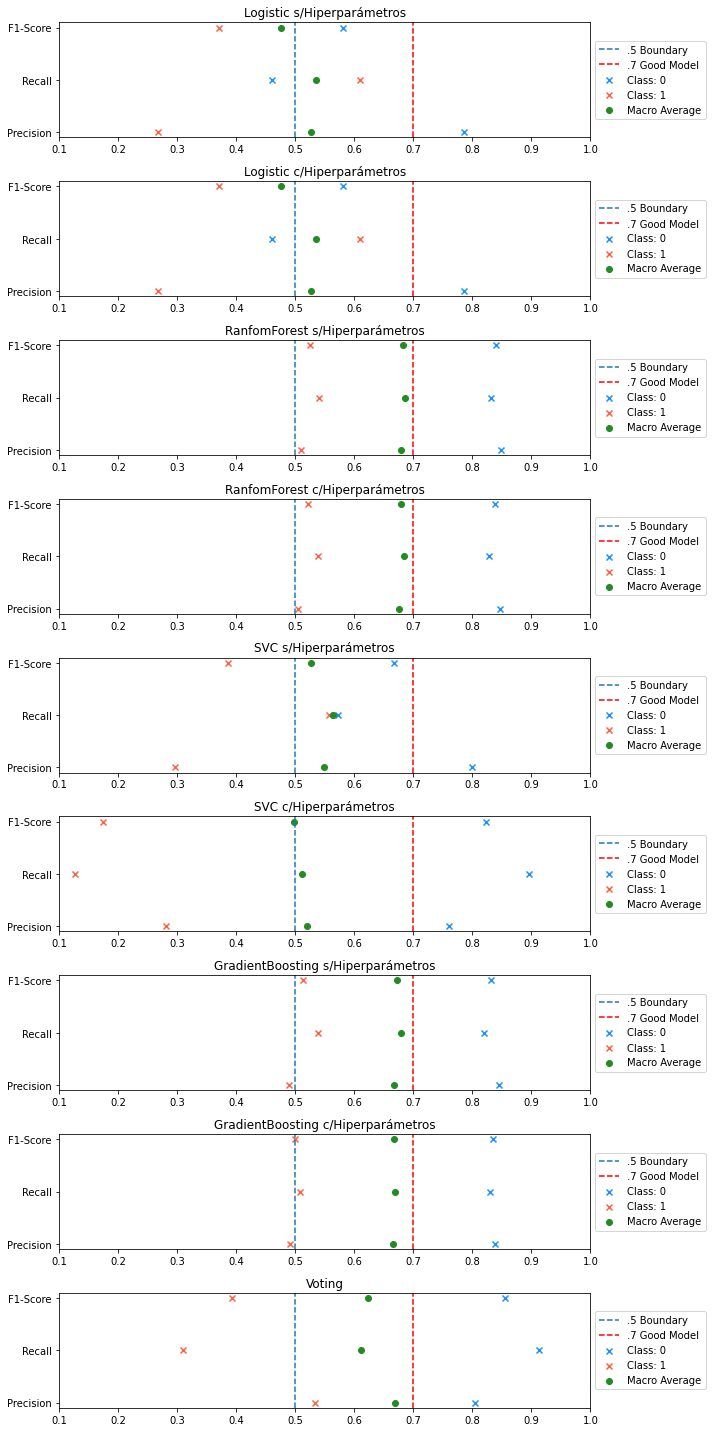

In [85]:
# Graficamos los score de los modelos con la función plot_classification_report
plt.figure(figsize=(10, 20))
for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    class_pred = value[1].predict(X_test_violence2)
    plot_classification_report(y_test_violence, class_pred)
    plt.axvline(.5, label='.5 Boundary', linestyle='--')
    plt.axvline(.7, label='.7 Good Model', linestyle='--', color='Red')
    plt.xlim((0.1, 1.0))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### **<font color='green'>Análisis de la experimentación</font>**

Es posibible ver que los dos mejores modelos observados son los RandomForest con y sin hipperparámetros. Acá mostramos en detalle sus métricas:

In [86]:
# Mostramos las métricas del RandomForest sin hiperparámetros
y_pred_rf = vln_rf2.predict(X_test_violence2)
print(f'''Modelo Random Forest: 
{classification_report(y_test_violence, y_pred_rf)}''')


# Mostramos las métricas del RandomForest con hiperparámetros
y_pred_rf_grilla = vln_grilla_rf2.best_estimator_.predict(X_test_violence2)
print(f'''Modelo Random Forest: 
{classification_report(y_test_violence, y_pred_rf_grilla)}''')

Modelo Random Forest: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4347
           1       0.51      0.54      0.52      1403

    accuracy                           0.76      5750
   macro avg       0.68      0.69      0.68      5750
weighted avg       0.77      0.76      0.76      5750

Modelo Random Forest: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4347
           1       0.50      0.54      0.52      1403

    accuracy                           0.76      5750
   macro avg       0.68      0.68      0.68      5750
weighted avg       0.76      0.76      0.76      5750



y sus respectivas matriz de confusión:

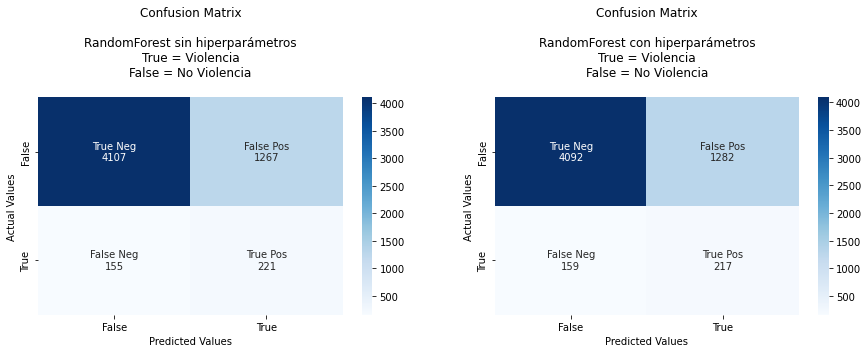

In [87]:
plt.figure(figsize=(15,4))

# Matriz de confusión RandomForest sin hiperparámetros
plt.subplot(1,2,1)
matriz_confusion(y_test_arstmade, y_pred_rf, title='Confusion Matrix\n\nRandomForest sin hiperparámetros\nTrue = Violencia\nFalse = No Violencia\n')

# Matriz de confusión RandomForest con hiperparámetros
plt.subplot(1,2,2)
matriz_confusion(y_test_arstmade, y_pred_rf_grilla, title='Confusion Matrix\n\nRandomForest con hiperparámetros\nTrue = Violencia\nFalse = No Violencia\n')

Ahora, compararemos estos modelos con el mejor modelo del hito 2 para ver cuál fue el mejor modelo:

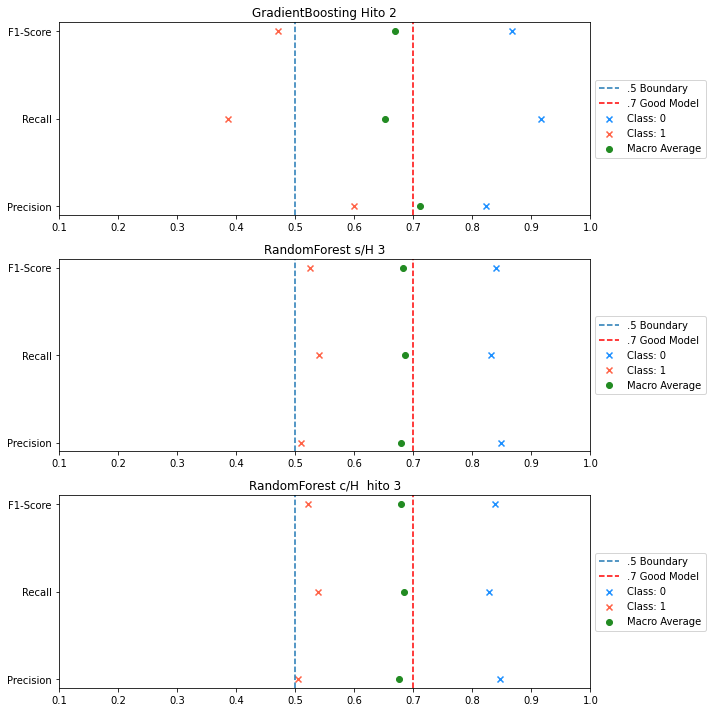

In [88]:
# Se crea un diccionario con los modelos a competir
estimators = [
    ('GradientBoosting Hito 2', vln_grilla_gb.best_estimator_),
    ('RandomForest s/H 3', vln_rf2),
    ('RandomForest c/H  hito 3', vln_grilla_rf2)                
]

# Graficamos los score de los modelos con la función plot_classification_report
plt.figure(figsize=(10, 10))
for index, value in enumerate(estimators):
    plt.subplot(len(estimators), 1, index + 1)
    plt.title(value[0])
    if index < 1:
        class_pred = value[1].predict(X_test_violence)
        plot_classification_report(y_test_violence, class_pred)
    else:
        class_pred = value[1].predict(X_test_violence2)
        plot_classification_report(y_test_violence, class_pred)
    plt.axvline(.5, label='.5 Boundary', linestyle='--')
    plt.axvline(.7, label='.7 Good Model', linestyle='--', color='Red')
    plt.xlim((0.1, 1.0))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

observando los modelos obtenidos, llegamos a la conclusión que los mejores modelos obtenidos son los del hito 3, ya que estos poseen casi las mismas métricas anteriores pero con solo 14 atributos (mientreas que el primer modelo eran 94)

#### **<font color='green'>Serialización de modelos</font>**

In [89]:
# RandomForest s/H
joblib.dump(vln_rf2, 'rodrigo_barraza_P2_violence_RFsH.pkl')

# RandomForest c/H
joblib.dump(vln_grilla_rf2.best_estimator_, 'rodrigo_barraza_P2_violence_RFcH.pkl')

['rodrigo_barraza_P2_violence_RFcH.pkl']